Error using corrcoef (line 80)
X and Y must have the same number of elements.



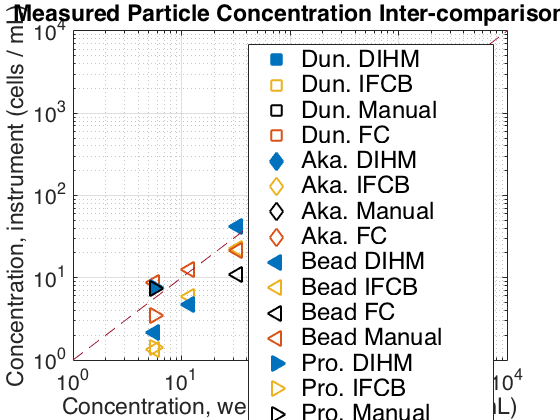

In [5]:
clear all 
close all
clc

cd '/Users/noahwalcutt/Documents/MatLab/gizmoPaper/dihmAnalysisMay23'

% a script for loading the results of the gizmo concentration, finding the
% index of the corresponding samples, plotting the concentration against a
% given variable, color-coding the legend

% load the vars for dihm, ifcb, fc, manual, cc. dump each file in common
% load /Volumes/holograms/dihm_analysis/organismDIHM
load /Users/noahwalcutt/Documents/MatLab/gizmoPaper/dihmAnalysisMay23/organismDIHM
% load  organismDIHM_finalStats
load  organismDIHM_finalStatsMay29
load organismIFCB_consolidated
load organismFC_consolidated

% final(27)=[]; % temp


finalDIHM3 = struct('tag',{finalDIHM.sample},'meanConcDIHM',{finalDIHM.ans_conc_fit},'stdDIHM',1,'instrument','dihm')';
finalDIHM2 = struct('tag',{finalDIHM.sample},'meanConcDIHM',{finalStats.artRemConcdihm},'stdDIHM',1,'instrument','dihm')';
finalDIHM2(14).meanConcDIHM = finalDIHM3(14).meanConcDIHM;
finalDIHM2(15).meanConcDIHM = finalDIHM3(15).meanConcDIHM;
finalDIHM2(16).meanConcDIHM = finalDIHM3(16).meanConcDIHM;
% finalStats(i).weightedConcArtRem

% function to combine all results into one structure
listTags = [[finalDIHM2.tag]';[{finalFC.tag}]';[{finalIFCB.tag}]'];
finalTag = unique(listTags);

% modified Jan 3, 2018
for i = 1:length(finalTag)
   temp = finalTag(i);
   
   temp2FC = [finalFC.meanConcFC];
   temp2IFCB = [finalIFCB.meanConcIFCB];
   temp2DIHM = [finalDIHM2.meanConcDIHM];
   
   temp2FCstd = [finalFC.stdFC];
   temp2IFCBstd = [finalIFCB.stdIFCB];
   temp2DIHMstd = [finalDIHM2.stdDIHM];
   
   tagIndexFC = strfind({finalFC.tag}, char(temp));
   tagIndexFC = find(~cellfun(@isempty,tagIndexFC));
   
   tagIndexIFCB = strfind({finalIFCB.tag}, char(temp));
   tagIndexIFCB = find(~cellfun(@isempty,tagIndexIFCB));
   
   tagIndexDIHM = strfind([finalDIHM2.tag], char(temp));
   tagIndexDIHM = find(~cellfun(@isempty,tagIndexDIHM));

   % conc
   final(i).tag = temp;
   final(i).concFC = temp2FC(tagIndexFC);
   final(i).concIFCB = temp2IFCB(tagIndexIFCB);
   final(i).concDIHM = temp2DIHM(tagIndexDIHM); % already converted DIHM to mL
   
   % std
   final(i).stdFC = temp2FCstd(tagIndexFC);
   final(i).stdIFCB = temp2IFCBstd(tagIndexIFCB);
   final(i).stdDIHM = temp2DIHMstd(tagIndexDIHM);
   
end

% zrinka -- beads
    final(1).concZrinka           = 8710 ./1000;
    final(2).concZrinka           = 12770 ./1000;
    final(3).concZrinka           = 21208 ./1000;
    final(4).concZrinka           = 79520 ./1000;
    final(5).concZrinka           = 92300 ./1000;
    
% zrinka -- dun
    final(6).concZrinka           = 170941 ./1000;
    final(7).concZrinka           = 282670 ./1000;
    final(8).concZrinka           = 983315 ./1000;

    final(6).stdZrinka        = 26976 ./1000;
    final(7).stdZrinka        = 64471 ./1000;
    final(8).stdZrinka        = 165529 ./1000;
    
    % het ak
    final(9).concZrinka        = 105080 ./1000;
    final(10).concZrinka        = 223650 ./1000;
    final(11).concZrinka        = 151467 ./1000;
    final(12).concZrinka        = 667400 ./1000;
    final(13).concZrinka        = 731300 ./1000;
    
    % niskin ctd 28 surface, mld, dcm
    final(14).concZrinka           = 58395 ./1000;
    final(15).concZrinka           = 38417 ./1000;
    final(16).concZrinka           = 44850 ./1000;
    
    final(14).stdZrinka        = 26976 ./1000;
    final(15).stdZrinka        = 10426 ./1000;
    final(16).stdZrinka        = 14596 ./1000;
    
    % pro micans    
    final(17).concZrinka           = 7400 ./1000;
    final(18).concZrinka           = 100438 ./1000;
    final(19).concZrinka           = 44563 ./1000;
    final(20).concZrinka           = 51933 ./1000;
    final(21).concZrinka           = 75830 ./1000;
    
    % DIHM concentration, May 30 2018
    final(14).concDIHM = 2097.77544196828;
    final(15).concDIHM = 1493.50368425865;
    final(16).concDIHM = 1703.13493618712;


% SMD results
final(25).tag = 'dunTer';

final(25).concFC = 70739;
final(25).concBD = 114198;
final(25).concMicro = 125400;
final(25).concMulti = 12834;

final(25).stdFC = 4743;
final(25).stdBD = 16575;
final(25).stdMicro = 13550;
final(25).stdMulti = 893;

% compute the weighted average (need to figure out how to weight by N, S)
% -- need to add FC points
for i = 1:length(finalStats)
    final(i).concEnsemble = mean([ final(i).concFC,  final(i).concDIHM,  final(i).concIFCB, final(i).concZrinka ]);
    final(i).concEnsembleNodihm = mean([ final(i).concFC,  final(i).concIFCB, final(i).concZrinka ]);
%     final(i).concEnsemble = mean([ final(i).concFC,  final(i).concIFCB, final(i).concZrinka ]);
    final(i).concEnsembleFractionDIHM =   finalStats(i).artRemConcdihm ./ final(i).concEnsemble; 
    final(i).concEnsembleFractionFC =   final(i).concFC ./ final(i).concEnsemble; 
    final(i).concEnsembleFractionIFCB =   final(i).concIFCB ./ final(i).concEnsemble; 
    final(i).concEnsembleFractionZrinka =   final(i).concZrinka ./ final(i).concEnsemble; 
    ensembleDIHM = mean([final(:).concEnsembleFractionDIHM]);
    ensembleFC = mean([final(:).concEnsembleFractionFC]);
    ensembleIFCB = mean([final(:).concEnsembleFractionIFCB]);
    ensembleZrinka = mean([final(:).concEnsembleFractionZrinka]);
end


% weighted mean (artifacts removed) - MAY 29 FYI THIS IS THE CODE USED TO
% COMPUTE THE WEIGHTED AVERAGE OF THE CONCENTRATIONS
for i = 1:length(finalStats)
   nSum = finalStats(i).nFC + finalStats(i).nIFCB;
   
   finalStats(i).weightedConcArtRem =  ...
       ((finalStats(i).artRemConcfc .* finalStats(i).nFC ./ (nSum)) + ...
       (finalStats(i).artRemConcifcb .* finalStats(i).nIFCB ./ (nSum))) + ...
       final(i).concZrinka ./2;
   
%    nSum = finalStats(i).nDIHM + finalStats(i).nFC + finalStats(i).nIFCB;
%    
%    finalStats(i).weightedMeanArtRem =  (finalStats(i).artRemWeightedESDdihm .* finalStats(i).nDIHM ./ (nSum)) + ...
%        (finalStats(i).artRemWeightedESDfc .* finalStats(i).nFC ./ (nSum)) + ...
%        (finalStats(i).artRemWeightedESDifcb .* finalStats(i).nIFCB ./ (nSum));
%    
%    finalStats(i).weightedConcArtRem =  (finalStats(i).artRemConcdihm .* finalStats(i).nDIHM ./ (nSum)) + ...
%        (finalStats(i).artRemConcfc .* finalStats(i).nFC ./ (nSum)) + ...
%        (finalStats(i).artRemConcifcb .* finalStats(i).nIFCB ./ (nSum));
   
   clear nSum
   
end


saveFrac = [final.concEnsemble]; % INSTEAD OF final.concEnsemble, USE finalStats.weightedConcArtRem
for i = 1:21
    final(i).concEnsemble = finalStats(i).weightedConcArtRem;
end

final(14).concEnsemble = saveFrac(14);
final(15).concEnsemble = saveFrac(15);
final(16).concEnsemble = saveFrac(16);

% cell array to choose what samples to show in the graph, using sampleTag
paramVars = {'d','h'};

% choose what instrument to show on the x-axis
paramX = {'ifcb'};

% assign colors to each instrument
% paramColor = {'y','b','k','r','c'};
paramColor = {'[.929 .694 .125 ]','[0 0.447 0.741]','k','[.85 .325 .098]','c'};

% assign shape to each sample type
paramShape = {'square','diamond','<','>','^','o'};

si = 10; %marker size

figure(1);
set(gcf,'WindowStyle','docked')
dunIFCB = loglog([final(6:8).concEnsemble],[finalStats(6:8).artRemConcifcb],'Marker',char(paramShape(1)),'Color',char(paramColor(1)),'MarkerSize',si,'LineStyle','none');
hold on
dunDIHM = loglog([final(6:8).concEnsemble],[finalStats(6:8).artRemConcdihm],'Marker',char(paramShape(1)),'Color',char(paramColor(2)),'MarkerSize',si,'LineStyle','none','MarkerFaceColor',char(paramColor(2)));
dunZrinka = loglog([final(6:8).concEnsemble],[final(6:8).concZrinka],'Marker',char(paramShape(1)),'Color',char(paramColor(3)),'MarkerSize',si,'LineStyle','none');
dunFC = loglog([final(6:8).concEnsemble],[finalStats(6:8).artRemConcfc],'Marker',char(paramShape(1)),'Color',char(paramColor(4)),'MarkerSize',si,'LineStyle','none');

hetIFCB = loglog([final(9:13).concEnsemble],[finalStats(9:13).artRemConcifcb],'Marker',char(paramShape(2)),'Color',char(paramColor(1)),'MarkerSize',si,'LineStyle','none');
hetDIHM = loglog([final(9:13).concEnsemble],[finalStats(9:13).artRemConcdihm],'Marker',char(paramShape(2)),'Color',char(paramColor(2)),'MarkerSize',si,'LineStyle','none','MarkerFaceColor',char(paramColor(2)));
% beadDIHM = loglog([final(1:5).concFC],[final(1:5).concDIHM],'Marker',char(paramShape(2)),'Color',char(paramColor(3)),'LineStyle','none','MarkerFaceColor',char(paramColor(3)));
hetZrinka = loglog([final(9:13).concEnsemble],[final(9:13).concZrinka],'Marker',char(paramShape(2)),'Color',char(paramColor(3)),'MarkerSize',si,'LineStyle','none');
hetFC = loglog([final(9:13).concEnsemble],[finalStats(9:13).artRemConcfc],'Marker',char(paramShape(2)),'Color',char(paramColor(4)),'MarkerSize',si,'LineStyle','none');


% removed per SMD request Mar 7, 2018
% dunTerBD = loglog([final(25).concFC],[final(25).concBD],'Marker',char(paramShape(4)),'Color',char(paramColor(1)),'LineStyle','none','MarkerSize',si);
% dunTerMicro = loglog([final(25).concFC],[final(25).concMicro],'Marker',char(paramShape(5)),'Color',char(paramColor(1)),'LineStyle','none','MarkerSize',si);
% dunTerMulti = loglog([final(25).concFC],[final(25).concMulti],'Marker',char(paramShape(6)),'Color',char(paramColor(1)),'LineStyle','none','MarkerSize',si);

beadIFCB = loglog([final(1:5).concEnsemble],[finalStats(1:5).artRemConcifcb],'Marker',char(paramShape(3)),'Color',char(paramColor(1)),'LineStyle','none','MarkerSize',si);
beadDIHM = loglog([final(1:5).concEnsemble],[finalStats(1:5).artRemConcdihm],'Marker',char(paramShape(3)),'Color',char(paramColor(2)),'LineStyle','none','MarkerSize',si,'MarkerFaceColor',char(paramColor(2)));
beadFC = loglog([final(1:5).concEnsemble],[finalStats(1:5).artRemConcfc],'Marker',char(paramShape(3)),'Color',char(paramColor(3)),'LineStyle','none','MarkerSize',si);
beadZrinka = loglog([final(1:5).concEnsemble],[final(1:5).concZrinka],'Marker',char(paramShape(3)),'Color',char(paramColor(4)),'LineStyle','none','MarkerSize',si);


proDIHM = loglog([final(17:21).concEnsemble],[finalStats(17:21).artRemConcdihm],'Marker',char(paramShape(4)),'Color',char(paramColor(2)),'LineStyle','none','MarkerFaceColor',char(paramColor(2)),'MarkerSize',si);
proIFCB = loglog([final(17:21).concEnsemble],[finalStats(17:21).artRemConcifcb],'Marker',char(paramShape(4)),'Color',char(paramColor(1)),'LineStyle','none','MarkerSize',si);
proZrinka = loglog([final(17:21).concEnsemble],[final(17:21).concZrinka],'Marker',char(paramShape(4)),'Color',char(paramColor(3)),'MarkerSize',si,'LineStyle','none');
proFC = loglog([final(17:21).concEnsemble],[finalStats(17:21).artRemConcfc],'Marker',char(paramShape(4)),'Color',char(paramColor(4)),'LineStyle','none','MarkerSize',si);

finalStats(14).artRemConcifcb = final(14).concIFCB;
finalStats(15).artRemConcifcb = final(15).concIFCB;
finalStats(16).artRemConcifcb = final(16).concIFCB;

finalStats(14).artRemConcfc = final(14).concFC;
finalStats(15).artRemConcfc = final(15).concFC;
finalStats(16).artRemConcfc = final(16).concFC;

niskDIHM = loglog([final(14:16).concEnsemble],[final(14:16).concDIHM],'Marker',char(paramShape(5)),'Color',char(paramColor(2)),'LineStyle','none','MarkerFaceColor',char(paramColor(2)),'MarkerSize',si);
niskIFCB = loglog([final(14:16).concEnsemble],[final(14:16).concIFCB],'Marker',char(paramShape(5)),'Color',char(paramColor(1)),'LineStyle','none','MarkerSize',si);
niskZrinka = loglog([final(14:16).concEnsemble],[final(14:16).concZrinka],'Marker',char(paramShape(5)),'Color',char(paramColor(3)),'MarkerSize',si,'LineStyle','none');
niskFC = loglog([final(14:16).concEnsemble],[final(14:16).concFC],'Marker',char(paramShape(5)),'Color',char(paramColor(4)),'LineStyle','none','MarkerSize',si);


x=logspace(0,5);
y=x;
logg = loglog(x,y,'--');



% 
% errdunFC = errorbar([final(6:8).concEnsemble],[final(6:8).concIFCB],[final(6:8).stdIFCB],    'Marker',char(paramShape(1)),'Color',char(paramColor(1)),'LineStyle','none','MarkerSize',si);
% errdunDIHM = errorbar([final(6:8).concEnsemble],[final(6:8).concDIHM],[final(6:8).stdDIHM],    'Marker',char(paramShape(2)),'Color',char(paramColor(1)),'LineStyle','none','MarkerFaceColor',char(paramColor(1)),'MarkerSize',si);
% errdunZrinka = errorbar([final(6:8).concEnsemble],[final(6:8).concZrinka],[final(6:8).stdZrinka],    'Marker',char(paramShape(3)),'Color',char(paramColor(1)),'LineStyle','none','MarkerSize',si);
% errhetFC = errorbar([final(9:13).concEnsemble],[final(9:13).concIFCB],[final(9:13).stdIFCB],    'Marker',char(paramShape(1)),'Color',char(paramColor(2)),'LineStyle','none','MarkerSize',si);
% errhetDIHM = errorbar([final(9:13).concEnsemble],[final(9:13).concDIHM],[final(9:13).stdDIHM],    'Marker',char(paramShape(2)),'Color',char(paramColor(2)),'LineStyle','none','MarkerFaceColor',char(paramColor(2)),'MarkerSize',si);
% errbeadDIHM = errorbar([final(1:5).concFC],[final(1:5).concDIHM],[final(1:5).stdDIHM],    'Marker',char(paramShape(2)),'Color',char(paramColor(3)),'LineStyle','none','MarkerFaceColor',char(paramColor(3)));

% errdunTerBD = errorbar([final(25).concFC],[final(25).concBD],[final(25).concBD],'Marker',char(paramShape(4)),'Color',char(paramColor(1)),'LineStyle','none','MarkerSize',si);
% errdunTerMicro = errorbar([final(25).concFC],[final(25).concMicro],[final(25).stdMicro],'Marker',char(paramShape(5)),'Color',char(paramColor(1)),'LineStyle','none','MarkerSize',si);
% errdunTerMulti = errorbar([final(25).concFC],[final(25).concMulti],[final(25).stdMulti],'Marker',char(paramShape(6)),'Color',char(paramColor(1)),'LineStyle','none','MarkerSize',si);
errorbarlogyy;

% herrdunFC = herrorbar([final(6:8).concFC],[final(6:8).concIFCB],[final(6:8).stdIFCB],'s');
% % herrdunDIHM = herrorbar([final(6:8).concFC],[final(6:8).concDIHM],[final(6:8).stdIFCB]);
% herrdunZrinka = herrorbar([final(6:8).concFC],[final(6:8).concZrinka],[final(6:8).stdIFCB],'<');
% herrhetFC = herrorbar([final(9:13).concFC],[final(9:13).concIFCB],[final(9:13).stdIFCB],'o');
% % herrhetDIHM = herrorbar([final(9:13).concFC],[final(9:13).concDIHM],[final(9:13).stdIFCB]);
% % herrbeadDIHM = herrorbar([final(1:5).concFC],[final(1:5).concDIHM],[final(1:5).stdIFCB]);
% errorbarlogxx

% set(herrdunFC,'LineStyle','-')
% set(herrdunDIHM,'LineStyle','-')
% set(herrdunZrinka,'LineStyle','-')
% set(herrhetFC,'LineStyle','-')
% set(herrhetDIHM,'LineStyle','-')
% set(herrbeadDIHM,'LineStyle','-')


% leg = legend(dunFC,dunDIHM);
% leg = legend([dunDIHM dunFC dunZrinka hetDIHM hetFC beadDIHM logg],{'Dun. DIHM','Dun. IFCB','Dun. Manual','Het. DIHM','Het. IFCB','Bead DIHM', '1:1 FC'});
% leg = legend([dunDIHM dunFC dunZrinka hetDIHM hetFC logg],{'Dun. DIHM','Dun. IFCB','Dun. Manual','Het. DIHM','Het. IFCB', '1:1 FC'});
% leg = legend([dunDIHM dunFC dunZrinka dunTerBD dunTerMicro dunTerMulti hetDIHM hetFC hetZrinka beadDIHM beadIFCB proDIHM proIFCB proZrinka niskDIHM niskIFCB niskZrinka logg],...
%     {'Dun. Holo','Dun. FlowCyto','Dun. Manual','Dun. BD Cyto','Dun. Micro',...
%     'Dun. Multi','Het. Holo','Het. FlowCyto','Het. Manual', 'Bead Holo','Bead FlowCyto','Pro DIHM','Pro IFCB','Pro Manual','Niskin Holo','Niskin IFCB','Niskin Manual','1:1 FlowCam'});

% removed bd, multi, and micro per SMD request Mar 7, 2018
leg = legend([dunDIHM dunIFCB dunZrinka dunFC    hetDIHM hetIFCB hetZrinka hetFC    beadDIHM beadIFCB beadFC beadZrinka    proDIHM proIFCB proZrinka proFC    niskDIHM niskIFCB niskZrinka niskFC    logg],...
    {'Dun. DIHM','Dun. IFCB','Dun. Manual','Dun. FC',...
    'Aka. DIHM','Aka. IFCB','Aka. Manual','Aka. FC',...
    'Bead DIHM','Bead IFCB','Bead FC','Bead Manual'...
    'Pro. DIHM','Pro. IFCB','Pro. Manual','Pro. FC',...
    'Niskin DIHM','Niskin IFCB','Niskin Manual','Niskin FC',...
    '1:1 Sample mean'});


leg.FontSize = 18;
set(leg,'Location','southeast')


title('Measured Particle Concentration Inter-comparison','FontSize', 34)
xlabel('Concentration, weighted average (cells / mL)','FontSize', 28)
ylabel('Concentration, instrument (cells / mL)','FontSize', 28)
set(gca,'FontSize',16)
grid on


dihmCount =sum(arrayfun(@(x) length(x.w_ESD),finalDIHM));

xlim([1,1e4])
ylim([1,1e4])

% % fit a curve to the holo data
%     figure(2)
%     xdata = [final(1:21).concEnsemble];
%     ydata = [final(1:21).concDIHM];
%     [slope(1), intercept(1),MSE(1), R2(1), S(1), ~, linePlot{1}, h{1}] = logfit(xdata,ydata,'loglog');
% 
% % add the line plot to the original figure
%     figure(1)
%     hold on
%     plot([linePlot{1}.XData],[linePlot{1}.YData],'r--')

% compute the CV for all conc., nanmean([final(:).cvOverall])
for i = 1:length(finalStats)
    [final(i).cvOverall] = std([final(i).concDIHM,finalStats(i).artRemConcfc,finalStats(i).artRemConcifcb,final(i).concZrinka]) ./ mean([final(i).concDIHM,finalStats(i).artRemConcfc,finalStats(i).artRemConcifcb,final(i).concZrinka]);
end

% compute the CC for all conc.
u = {1:5;  6:8;  9:13; 14:16; 17:21};

for i = 1:length(u); 
   [final(i).ccDIHM ~] = corrcoef([finalStats(u{i}).artRemConcdihm],[final(u{i}).concEnsembleNodihm]);
   [final(i).avFracDIHM] = mean([final(u{i}).concEnsembleFractionDIHM]);
end

    % DIHM concentration, May 30 2018
    finalStats(14).artRemConcdihm = 2097.77544196828;
    finalStats(15).artRemConcdihm = 1493.50368425865;
    finalStats(16).artRemConcdihm = 1703.13493618712;

% overall CC
[paperccOverall ~] = corrcoef([finalStats(1:21).artRemConcdihm],[final(1:21).concEnsemble]);

[paperccOverallbead ~] = corrcoef([finalStats(1:5).artRemConcdihm],[final(1:5).concEnsemble]);

[paperccOverallNISKIN ~] = corrcoef([finalStats(14:16).artRemConcdihm],[final(14:16).concEnsemble]);

[paperccOverallPro ~] = corrcoef([finalStats(17:21).artRemConcdihm],[final(17:21).concEnsemble])


[final(1).ccDIHMvIFCB ~] = corrcoef([finalStats(1:21).artRemConcdihm],[finalStats(1:21).artRemConcifcb])
[final(1).ccDIHMvFC ~] = corrcoef([finalStats(1:21).artRemConcdihm],[finalStats(1:21).artRemConcfc])
[final(1).ccDIHMvZrinka ~] = corrcoef([finalStats(1:21).artRemConcdihm],[final(1:21).concZrinka])

[final(1).ccFCvIFCB ~] = corrcoef([finalStats(1:21).artRemConcfc],[finalStats(1:21).artRemConcifcb]);

% [final(u(i)).concDIHM,final(i).concFC,final(i).concIFCB,final(i).concZrinka]) ./ mean([final(i).concDIHM,final(i).concFC,final(i).concIFCB,final(i).concZrinka]

% L:H analysis - Dun
lhDunEn = final(6).concEnsembleNodihm ./ final(8).concEnsembleNodihm;
lhDunDIHM = final(6).concDIHM ./ final(8).concDIHM;

overallConcFractionDIHM = nanmean([final.avFracDIHM])

paperaverageOverallMult = mean([horzcat(finalStats.multiply_final)])
figure(2)
histogram([horzcat(finalStats.multiply_final)])
papermultPerc =  1.8e+05 / length([horzcat(finalStats.multiply_final)])

papermultCV = std( [horzcat(finalStats.multiply_final)] ./ mean([horzcat(finalStats.multiply_final)]))



set(gcf,'color','w')
export_fig(gcf)

> In legend>set_children_and_strings (line 629)
  In legend>make_legend (line 321)
  In legend (line 247)
  In gizmoParticleSizes_fixYaxis_stacker (line 21)
> In legend>set_children_and_strings (line 629)
  In legend>make_legend (line 321)
  In legend (line 247)
  In gizmoParticleSizes_fixYaxis_stacker (line 21)
> In legend>set_children_and_strings (line 629)
  In legend>make_legend (line 321)
  In legend (line 247)
  In gizmoParticleSizes_fixYaxis_stacker (line 21)
> In legend>set_children_and_strings (line 629)
  In legend>make_legend (line 321)
  In legend (line 247)
  In gizmoParticleSizes_fixYaxis_stacker (line 21)
> In legend>set_children_and_strings (line 629)
  In legend>make_legend (line 321)
  In legend (line 247)
  In gizmoParticleSizes_fixYaxis_stacker_average (line 19)
> In legend>set_children_and_strings (line 629)
  In legend>make_legend (line 321)
  In legend (line 247)
  In gizmoParticleSizes_fixYaxis_stacker_average (line 19)
> In legend>set_children_and_strings (line

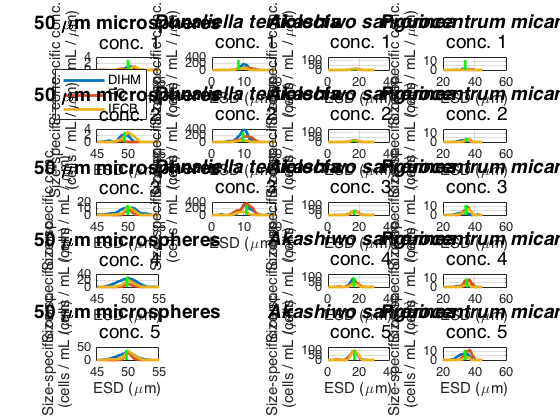

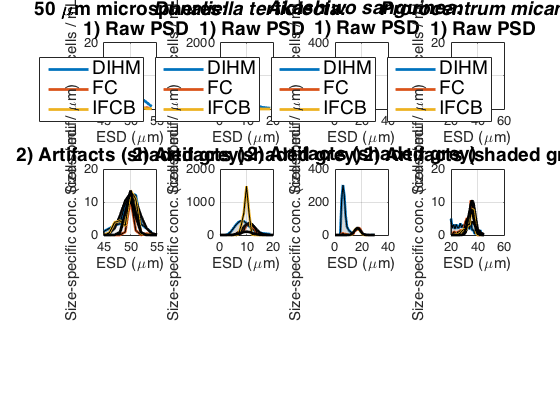

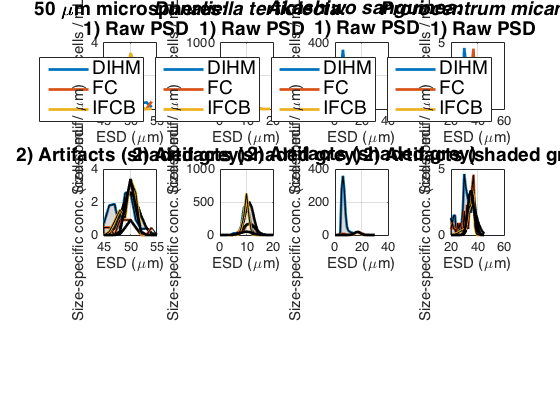

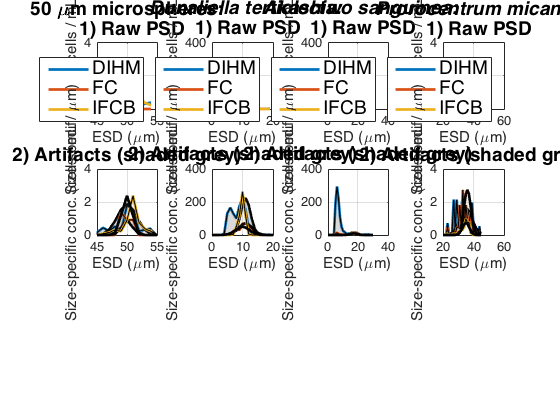

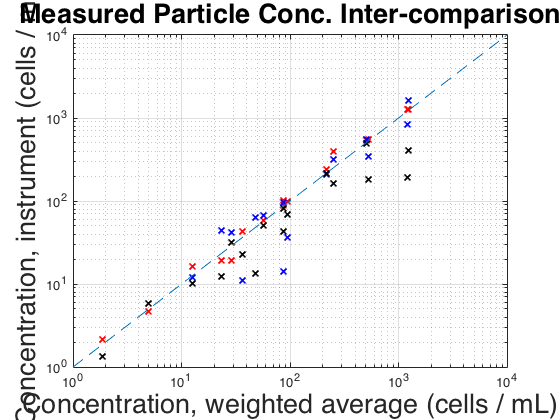

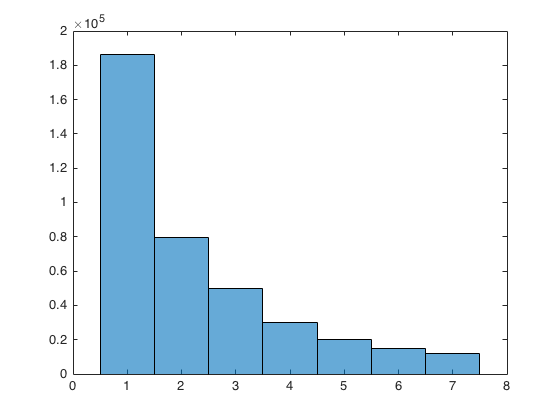

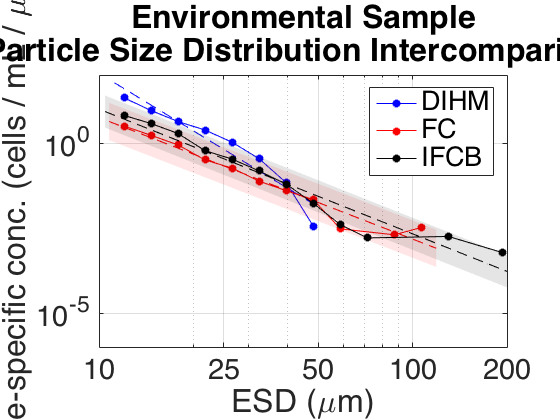

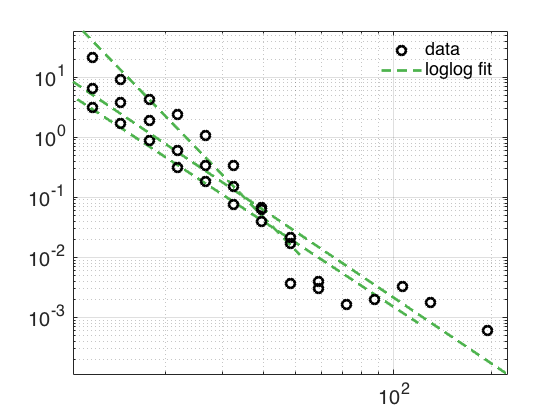

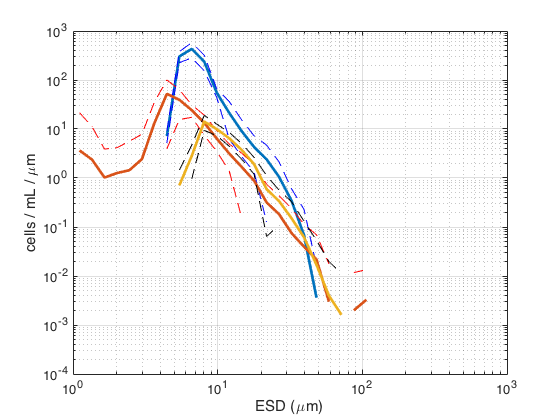

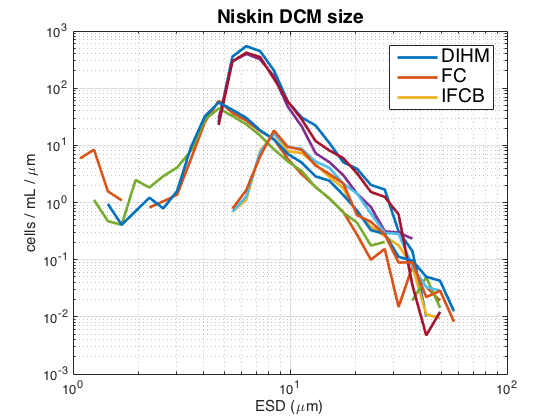

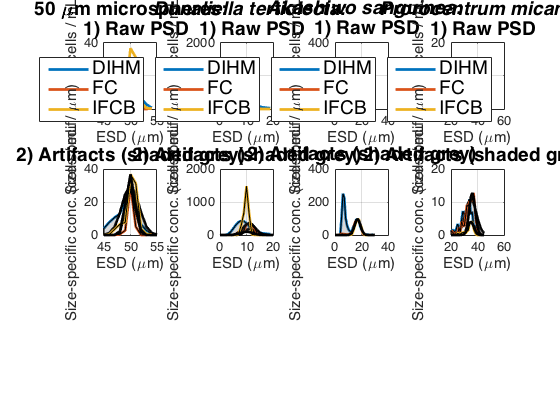

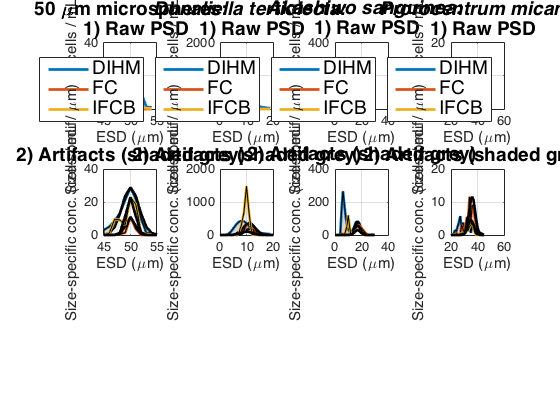

In [6]:
clear all 
close all
clc

% plot the raw psd of ifcb, dihm and fc for beads, dunaliella, heterosigma,
% and prorocentrum highest concentrations (averaged). Also creates psds for
% the flk ctd 28 surface, mld, and dcm niskins.
% organismDIHM is generated by dihmAnalysis on the MSI laptop/NAS
% organismFC is generated by fcAnalysis
% organismIFCB is generated by ifcbAnalysis
% file cleanup/archive jan 11

%% load the vars for dihm, ifcb, fc, manual, cc. dump each file in common
% load /Volumes/holograms/dihm_analysis/organismDIHM
% load concolidate_output/dihmFinal
load /Users/noahwalcutt/Documents/MatLab/gizmoPaper/dihmAnalysisMay23/organismDIHM
load organismIFCB
load organismFC

%% May 3 - did a global find a replace for esdDIHMrpCorrected with repeated_sf_plane
%% May 29 - reversed that change % MAY 29 - REPLACE w_ESD with repeasted_sf_plane

% swap the old esd with the new
% uu = fieldnames(finalDIHM);
% uu{36}='repeated_sf_plane_old';
% uu{20}='repeated_sf_plane';

%% added April 5 -- create indicies for generating ALL PSDs
    % conc 1 = bdhp
    iDIHM(1,:) = [1;6;9;17];
    iDIHM(2,:) = [2;7;10;18];
    iDIHM(3,:) = [3;8;11;19];
    iDIHM(4,:) = [4;8;12;20];
    iDIHM(5,:) = [5;8;13;21];
    
    iFC(1,:) = {1:3;   16:18; 25:27; 47:49};
    iFC(2,:) = {4:6;   19:21; 28:30; 50:52};
    iFC(3,:) = {7:9;   22:24; 31:33; 53:55};
    iFC(4,:) = {10:12; 22:24; 34:37; 56:59};
    iFC(5,:) = {13:15; 22:24; 38:40; 60:62};
    
    iIFCB(1,:) = {1:3;   16:18; 25:27; 49:51};
    iIFCB(2,:) = {4:6;   19:21; 28:30; 51:53};
    iIFCB(3,:) = {7:9;   22:24; 31:33; 55:57};
    iIFCB(4,:) = {10:12; 22:24; 24:36; 58:60};
    iIFCB(5,:) = {13:15; 22:24; 37:39; 61:63};
    
    ee=0;
%% 1New - DIHM plot all of the DIHM histograms on top of each other

bw = 1;
bins = {[45:bw:55];[0:bw:20];[0:bw:30];[20:bw:60];[20:bw:45]};
tag = {'DIHM Bead','DIHM Dun','DIHM Het','Niskin','DIHM Pro'};
mlconvert = 0;

% show all steps
for qr=1:5
% figure(qr)
%     subplot(3,4,1)
% 
%     [stacked_plots(1)] = gizmoParticleSizes_fixYaxis_stacker(finalDIHM( iDIHM(qr,1) ).repeated_sf_plane,bins{1},tag{1},finalDIHM( iDIHM(qr,1) ).ans_total_volume_sampled,bw, mlconvert);
%         hold on
%     
%     subplot(3,4,2)
%     [stacked_plots(2)] = gizmoParticleSizes_fixYaxis_stacker(finalDIHM( iDIHM(qr,2) ).repeated_sf_plane,bins{2},tag{2},finalDIHM( iDIHM(qr,2) ).ans_total_volume_sampled,bw, mlconvert);
%     hold on
%     
%     subplot(3,4,3)
%     [stacked_plots(3)] = gizmoParticleSizes_fixYaxis_stacker(finalDIHM( iDIHM(qr,3) ).repeated_sf_plane,bins{3},tag{3},finalDIHM( iDIHM(qr,3) ).ans_total_volume_sampled,bw, mlconvert);
%     hold on
%     
%     subplot(3,4,4)
%     [stacked_plots(5)] = gizmoParticleSizes_fixYaxis_stacker(finalDIHM( iDIHM(qr,4) ).repeated_sf_plane,bins{5},tag{5},finalDIHM( iDIHM(qr,4) ).ans_total_volume_sampled,bw, mlconvert);
%     hold on
%     
% %% 2New - FC plot all of the FC histograms on top of each other needs editing
% 
% % bins = {[0:bw:60];[0:bw:18];[0:bw:30];[0:bw:50];[0:bw:45]};
% tag = {'FC Bead','FC Dun','FC Het','Niskin','FC Pro'};
% mlconvert = 0;
% 
%     subplot(3,4,1)
%     [stacked_plots(6)] = gizmoParticleSizes_fixYaxis_stacker_average(  {fc(  iFC{qr,1}  ).esd}  ,bins{1},tag{1},{fc(  iFC{qr,1}  ).volPro},bw, mlconvert);
% 
%     subplot(3,4,2)
%     [stacked_plots(7)] = gizmoParticleSizes_fixYaxis_stacker_average({fc(  iFC{qr,2}  ).esd},bins{2},tag{2},{fc(  iFC{qr,2}  ).volPro},bw, mlconvert);
% 
%     subplot(3,4,3)
%     [stacked_plots(8)] = gizmoParticleSizes_fixYaxis_stacker_average({fc(  iFC{qr,3}  ).esd},bins{3},tag{3},{fc(  iFC{qr,3}  ).volPro},bw, mlconvert);
% 
%     subplot(3,4,4)
%     [stacked_plots(10)] = gizmoParticleSizes_fixYaxis_stacker_average({fc(  iFC{qr,4}  ).esd},bins{5},tag{5},{fc(  iFC{qr,4}  ).volPro},bw, mlconvert);
%     
% %% 3New - IFCB plot all of the IFCB histograms on top of each other needs editing
% 
% % bins = {[0:bw:60];[0:bw:18];[0:bw:30];[0:bw:50];[0:bw:45]};
% tag = {'50 \mum microspheres:','\it Dunaliella tertiolecta:','\it Akashiwo sanguinea:','Pro','\it Prorocentrum micans:'};
% tagSave = tag;
% mlconvert = 0;
% 
%     subplot(3,4,1)
%         hold on
%     [stacked_plots(11)] = gizmoParticleSizes_fixYaxis_stacker_average({ifcb(  iIFCB{qr,1}  ).esd},bins{1},tag{1},{ifcb(  iIFCB{qr,1}  ).ml_analyzed},bw, mlconvert);
% 
% for i =   iIFCB{qr,2}  ;
%     % remove black dot on IFCB between 7.8 and 8.1
%     deleteIFCB = find([ifcb(i).esd] >=9.6 & [ifcb(i).esd] <= 10.2);
%     ifcb(i).esd(deleteIFCB) = [];
% end
%     subplot(3,4,2)
%     [stacked_plots(12)] = gizmoParticleSizes_fixYaxis_stacker_average({ifcb(  iIFCB{qr,2}  ).esd},bins{2},tag{2},{ifcb(  iIFCB{qr,2}  ).ml_analyzed},bw, mlconvert);
% 
%     subplot(3,4,3)
%     [stacked_plots(13)] = gizmoParticleSizes_fixYaxis_stacker_average({ifcb(  iIFCB{qr,3}  ).esd},bins{3},tag{3},{ifcb(  iIFCB{qr,3}  ).ml_analyzed},bw, mlconvert);
% 
%     subplot(3,4,4)
%     [stacked_plots(15)] = gizmoParticleSizes_fixYaxis_stacker_average({ifcb(  iIFCB{qr,4}  ).esd},bins{5},tag{5},{ifcb(  iIFCB{qr,4}  ).ml_analyzed},bw, mlconvert);
%     
%     hold off
%     
%     
%     
%     
%     
%     
%     
%     
%     
%     
%     
%     
%     
% %% 4New - Fit A Gaussian to the DIHM
% %     peak = [6.817; 2172; 108.6; 12.95;  29.62;359.9;95.39;12.77;      36.77;100;96.67;3.975];
% %     width = [0.2;0.2;0.1;0.03;           0.7;0.1;0.1;0.1;              0.7;0.1;0.1;0.1];
% %     center = [50;8;15;32;                50;11;17;36;               50;10;17;35];
% 
%     ipeak(1,:) = [3.159; 267.3; 12.08; 8.224;      .9138; 70.54; 14.6;2.737;      2.38;50;9.99;0.736];  
%     
%     ipeak(2,:) = [3.899; 744.1; 18.34; 8.326;      .9116;170.9;18.34;3.368;      3.396;50;18.41;3.368];
%     
%     ipeak(3,:) = [4.997; 2172; 42.32; 6.087;      10.96;359.9;41.43;10.5;      13.48;100;41.43;7.804];
%     
%     ipeak(4,:) = [5.447; 2172; 71.29; 7.85;      10.95;359.9;57.86;11.62;      22.91;100;29.14;4.524];
%     
%     ipeak(5,:) = [6.817; 2172; 108.6; 12.95;      29.62;359.9;95.39;12.77;      36.77;100;96.67;3.975];
%     
%     peak = ipeak(qr,:);
%     width = [0.2;0.2;0.1;0.03;           0.7;0.1;0.1;0.1;              0.7;0.1;0.1;0.1];
%     center = [50;8;15;32;                50;11;17;36;               50;10;17;35];
%     
%     
%     confidence = 0.1;
%     clear tag
%     tag = {'DIHM Bead Largest Conc only','Dun','Het','Pro','Pro'};
% % figure(33)
%     subplot(3,4,5)
%     [stacked_plotsA(1)] = gizmoFitSize(finalDIHM( iDIHM(qr,1) ).repeated_sf_plane,bins{1},tag{1},finalDIHM( iDIHM(qr,1) ).ans_total_volume_sampled,bw,mlconvert,peak(1),width(1),center(1),confidence);
%         hold on
%     
%     subplot(3,4,6)
%     [stacked_plotsA(2)] = gizmoFitSize(finalDIHM( iDIHM(qr,2) ).repeated_sf_plane,bins{2},tag{2},finalDIHM( iDIHM(qr,2) ).ans_total_volume_sampled,bw,mlconvert,peak(2),width(2),center(2),confidence);
%     hold on
%     
%     subplot(3,4,7)
%     [stacked_plotsA(3)] = gizmoFitSize(finalDIHM( iDIHM(qr,3) ).repeated_sf_plane,bins{3},tag{3},finalDIHM( iDIHM(qr,3) ).ans_total_volume_sampled,bw,mlconvert,peak(3),width(3),center(3),confidence);
%     hold on
%     
%     subplot(3,4,8)
%     [stacked_plotsA(5)] = gizmoFitSize(finalDIHM( iDIHM(qr,4) ).repeated_sf_plane,bins{5},tag{5},finalDIHM( iDIHM(qr,4) ).ans_total_volume_sampled,bw,mlconvert,peak(4),width(4),center(4),confidence);
% %     hold on
% % hold off
% 
% %% 5new - fit a gaussian to FC
% %     figure(122)
% clear tag
% tag = {'FC Bead Largest Conc only','Dun','Het','Pro','Pro'};
% hold on 
%     subplot(3,4,5)
%     [stacked_plotsAa(6)] = gizmoParticleSizes_fixYaxis_stacker_average_art({fc(  iFC{qr,1}  ).esd},bins{1},tag{1},{fc(  iFC{qr,1}  ).volPro},bw, mlconvert,peak(5),width(5),center(5),confidence);
% 
%     subplot(3,4,6)
%     [stacked_plotsAa(7)] = gizmoParticleSizes_fixYaxis_stacker_average_art({fc(  iFC{qr,2}  ).esd},bins{2},tag{2},{fc(  iFC{qr,2}  ).volPro},bw, mlconvert,peak(6),width(6),center(6),confidence);
% 
%     subplot(3,4,7)
%     [stacked_plotsAa(8)] = gizmoParticleSizes_fixYaxis_stacker_average_art({fc(  iFC{qr,3}  ).esd},bins{3},tag{3},{fc(  iFC{qr,3}  ).volPro},bw, mlconvert,peak(7),width(7),center(7),confidence);
% 
%     subplot(3,4,8)
%     [stacked_plotsAa(10)] = gizmoParticleSizes_fixYaxis_stacker_average_art({fc(  iFC{qr,4}  ).esd},bins{5},tag{5},{fc(  iFC{qr,4}  ).volPro},bw, mlconvert,peak(8),width(8),center(8),confidence);
% %     hold off
%     
% %% 6new - fit a gaussian to IFCB
% %     figure(132)
% clear tag
% tag = {'IFCB Bead Largest Conc only','Dun','Het','Pro','Pro'};
%     subplot(3,4,5)
%         hold on
%     [stacked_plotsAa(11)] = gizmoParticleSizes_fixYaxis_stacker_average_art({ifcb(  iIFCB{qr,1}  ).esd},bins{1},tag{1},{ifcb(  iIFCB{qr,1}  ).ml_analyzed},bw, mlconvert,peak(9),width(9),center(9),confidence);
% 
%     subplot(3,4,6)
%     [stacked_plotsAa(12)] = gizmoParticleSizes_fixYaxis_stacker_average_art({ifcb(  iIFCB{qr,2}  ).esd},bins{2},tag{2},{ifcb(  iIFCB{qr,2}  ).ml_analyzed},bw, mlconvert,peak(10),width(10),center(10),confidence);
% 
%     subplot(3,4,7)
%     [stacked_plotsAa(13)] = gizmoParticleSizes_fixYaxis_stacker_average_art({ifcb(  iIFCB{qr,3}  ).esd},bins{3},tag{3},{ifcb(  iIFCB{qr,3}  ).ml_analyzed},bw, mlconvert,peak(11),width(11),center(11),confidence);
% 
%     subplot(3,4,8)
%     [stacked_plotsAa(15)] = gizmoParticleSizes_fixYaxis_stacker_average_art({ifcb(  iIFCB{qr,4}  ).esd},bins{5},tag{5},{ifcb(  iIFCB{qr,4}  ).ml_analyzed},bw, mlconvert,peak(12),width(12),center(12),confidence);
%     
% %     hold off
% 
%     
%     
%     
%     
%     
%     
%     
%     
% %% RRrrerasf245re#New - Plot the gaussians on one plot
% 
% colorG = {'b','r','y'};
% 
% % figure(34)
%     subplot(3,4,9)
%     [stacked_plotsAa(1)] = gizmoFitSizeG(finalDIHM( iDIHM(qr,1) ).repeated_sf_plane,bins{1},tag{1},finalDIHM( iDIHM(qr,1) ).ans_total_volume_sampled,bw,mlconvert,peak(1),width(1),center(1),confidence,colorG{1});
%         hold on
%     
%     subplot(3,4,10)
%     [stacked_plotsAa(2)] = gizmoFitSizeG(finalDIHM( iDIHM(qr,2) ).repeated_sf_plane,bins{2},tag{2},finalDIHM( iDIHM(qr,2) ).ans_total_volume_sampled,bw,mlconvert,peak(2),width(2),center(2),confidence,colorG{1});
%     hold on
%     
%     subplot(3,4,11)
%     [stacked_plotsAa(3)] = gizmoFitSizeG(finalDIHM( iDIHM(qr,3) ).repeated_sf_plane,bins{3},tag{3},finalDIHM( iDIHM(qr,3) ).ans_total_volume_sampled,bw,mlconvert,peak(3),width(3),center(3),confidence,colorG{1});
%     hold on
%     
%     subplot(3,4,12)
%     [stacked_plotsAa(5)] = gizmoFitSizeG(finalDIHM( iDIHM(qr,4) ).repeated_sf_plane,bins{5},tag{5},finalDIHM( iDIHM(qr,4) ).ans_total_volume_sampled,bw,mlconvert,peak(4),width(4),center(4),confidence,colorG{1});
%     hold on
% 
% 
% %% RR5new - fit a gaussian to FC
% %     figure(122)
% clear tag
% tag = {'FC Bead Largest Conc only','Dun','Het','Pro','Pro'};
%     subplot(3,4,9)
%     [stacked_plotsAa(6)] = gizmoParticleSizes_fixYaxis_stacker_average_artG({fc(  iFC{qr,1}  ).esd},bins{1},tag{1},{fc(  iFC{qr,1}  ).volPro},bw, mlconvert,peak(5),width(5),center(5),confidence,colorG{2});
% 
%     subplot(3,4,10)
%     [stacked_plotsAa(7)] = gizmoParticleSizes_fixYaxis_stacker_average_artG({fc(  iFC{qr,2}  ).esd},bins{2},tag{2},{fc(  iFC{qr,2}  ).volPro},bw, mlconvert,peak(6),width(6),center(6),confidence,colorG{2});
% 
%     subplot(3,4,11)
%     [stacked_plotsAa(8)] = gizmoParticleSizes_fixYaxis_stacker_average_artG({fc(  iFC{qr,3}  ).esd},bins{3},tag{3},{fc(  iFC{qr,3}  ).volPro},bw, mlconvert,peak(7),width(7),center(7),confidence,colorG{2});
% 
%     subplot(3,4,12)
%     [stacked_plotsAa(10)] = gizmoParticleSizes_fixYaxis_stacker_average_artG({fc(  iFC{qr,4}  ).esd},bins{5},tag{5},{fc(  iFC{qr,4}  ).volPro},bw, mlconvert,peak(8),width(8),center(8),confidence,colorG{2});
% %     hold off
%     
% %% RR6new - fit a gaussian to IFCB
% %     figure(132)
% clear tag
% tag = {'IFCB Bead Largest Conc only','Dun','Het','Pro','Pro'};
%     subplot(3,4,9)
% %         hold on
%     [stacked_plotsAa(11)] = gizmoParticleSizes_fixYaxis_stacker_average_artG({ifcb(  iIFCB{qr,1}  ).esd},bins{1},tag{1},{ifcb(  iIFCB{qr,1}  ).ml_analyzed},bw, mlconvert,peak(9),width(9),center(9),confidence,colorG{3});
% 
%     subplot(3,4,10)
%     [stacked_plotsAa(12)] = gizmoParticleSizes_fixYaxis_stacker_average_artG({ifcb(  iIFCB{qr,2}  ).esd},bins{2},tag{2},{ifcb(  iIFCB{qr,2}  ).ml_analyzed},bw, mlconvert,peak(10),width(10),center(10),confidence,colorG{3});
% 
%     subplot(3,4,11)
%     [stacked_plotsAa(13)] = gizmoParticleSizes_fixYaxis_stacker_average_artG({ifcb(  iIFCB{qr,3}  ).esd},bins{3},tag{3},{ifcb(  iIFCB{qr,3}  ).ml_analyzed},bw, mlconvert,peak(11),width(11),center(11),confidence,colorG{3});
% 
%     subplot(3,4,12);
%     [stacked_plotsAa(15)] = gizmoParticleSizes_fixYaxis_stacker_average_artG({ifcb(  iIFCB{qr,4}  ).esd},bins{5},tag{5},{ifcb(  iIFCB{qr,4}  ).ml_analyzed},bw, mlconvert,peak(12),width(12),center(12),confidence,colorG{3});
%     
%     hold off
% 
%     clear peak
end
    
    
% loop through all five concentrations, create plots for only the final
% monoculture results
for qr=1:5
figure(qr)
    subplot(3,4,1)

    [stacked_plots(1)] = gizmoParticleSizes_fixYaxis_stacker(finalDIHM( iDIHM(qr,1) ).repeated_sf_plane,bins{1},tag{1},finalDIHM( iDIHM(qr,1) ).ans_total_volume_sampled,bw, mlconvert);
        hold on
    
    subplot(3,4,2)
    [stacked_plots(2)] = gizmoParticleSizes_fixYaxis_stacker(finalDIHM( iDIHM(qr,2) ).repeated_sf_plane,bins{2},tag{2},finalDIHM( iDIHM(qr,2) ).ans_total_volume_sampled,bw, mlconvert);
    hold on
    
    subplot(3,4,3)
    [stacked_plots(3)] = gizmoParticleSizes_fixYaxis_stacker(finalDIHM( iDIHM(qr,3) ).repeated_sf_plane,bins{3},tag{3},finalDIHM( iDIHM(qr,3) ).ans_total_volume_sampled,bw, mlconvert);
    hold on
    
    subplot(3,4,4)
    [stacked_plots(5)] = gizmoParticleSizes_fixYaxis_stacker(finalDIHM( iDIHM(qr,4) ).repeated_sf_plane,bins{5},tag{5},finalDIHM( iDIHM(qr,4) ).ans_total_volume_sampled,bw, mlconvert);
    hold on
    
%% 2New - FC plot all of the FC histograms on top of each other needs editing

% bins = {[0:bw:60];[0:bw:18];[0:bw:30];[0:bw:50];[0:bw:45]};
tag = {'FC Bead','FC Dun','FC Het','Niskin','FC Pro'};
mlconvert = 0;

    subplot(3,4,1)
    [stacked_plots(6)] = gizmoParticleSizes_fixYaxis_stacker_average(  {fc(  iFC{qr,1}  ).esd}  ,bins{1},tag{1},{fc(  iFC{qr,1}  ).volPro},bw, mlconvert);

    subplot(3,4,2)
    [stacked_plots(7)] = gizmoParticleSizes_fixYaxis_stacker_average({fc(  iFC{qr,2}  ).esd},bins{2},tag{2},{fc(  iFC{qr,2}  ).volPro},bw, mlconvert);

    subplot(3,4,3)
    [stacked_plots(8)] = gizmoParticleSizes_fixYaxis_stacker_average({fc(  iFC{qr,3}  ).esd},bins{3},tag{3},{fc(  iFC{qr,3}  ).volPro},bw, mlconvert);

    subplot(3,4,4)
    [stacked_plots(10)] = gizmoParticleSizes_fixYaxis_stacker_average({fc(  iFC{qr,4}  ).esd},bins{5},tag{5},{fc(  iFC{qr,4}  ).volPro},bw, mlconvert);
    
%% 3New - IFCB plot all of the IFCB histograms on top of each other needs editing

% bins = {[0:bw:60];[0:bw:18];[0:bw:30];[0:bw:50];[0:bw:45]};
tag = {'50 \mum microspheres:','\it Dunaliella tertiolecta:','\it Akashiwo sanguinea:','Pro','\it Prorocentrum micans:'};
tagSave = tag;
mlconvert = 0;

    subplot(3,4,1)
        hold on
    [stacked_plots(11)] = gizmoParticleSizes_fixYaxis_stacker_average({ifcb(  iIFCB{qr,1}  ).esd},bins{1},tag{1},{ifcb(  iIFCB{qr,1}  ).ml_analyzed},bw, mlconvert);
%         ylim([0 45])
        
for i =   iIFCB{qr,2}  ;
    % remove black dot on IFCB between 7.8 and 8.1
    deleteIFCB = find([ifcb(i).esd] >=9.6 & [ifcb(i).esd] <= 10.2);
    ifcb(i).esd(deleteIFCB) = [];
end
    subplot(3,4,2)
    [stacked_plots(12)] = gizmoParticleSizes_fixYaxis_stacker_average({ifcb(  iIFCB{qr,2}  ).esd},bins{2},tag{2},{ifcb(  iIFCB{qr,2}  ).ml_analyzed},bw, mlconvert);
%         ylim([0 2500])
        
    subplot(3,4,3)
    [stacked_plots(13)] = gizmoParticleSizes_fixYaxis_stacker_average({ifcb(  iIFCB{qr,3}  ).esd},bins{3},tag{3},{ifcb(  iIFCB{qr,3}  ).ml_analyzed},bw, mlconvert);
%         ylim([0 130])
        
    subplot(3,4,4)
    [stacked_plots(15)] = gizmoParticleSizes_fixYaxis_stacker_average({ifcb(  iIFCB{qr,4}  ).esd},bins{5},tag{5},{ifcb(  iIFCB{qr,4}  ).ml_analyzed},bw, mlconvert);
%         ylim([0 15])
    hold off
    
    
    
    
    
    
    
    
    
    
    
    
    
%% 4New - Fit A Gaussian to the DIHM
%     peak = [6.817; 2172; 108.6; 12.95;  29.62;359.9;95.39;12.77;      36.77;100;96.67;3.975];
%     width = [0.2;0.2;0.1;0.03;           0.7;0.1;0.1;0.1;              0.7;0.1;0.1;0.1];
%     center = [50;8;15;32;                50;11;17;36;               50;10;17;35];

    ipeak(1,:) = [1.8687; 223.7; 10.5; 1.609;      .9138; 70.54; 14.6;2.737;      2.38;50;9.99;0.736];  
    
    ipeak(2,:) = [2.586; 502.9; 17.55; 2.405;      .9116;170.9;18.34;3.368;      3.396;50;18.41;3.368];
    
    ipeak(3,:) = [12.65; 352.9; 42.86; 3.951;      10.96;359.9;41.43;10.5;      13.48;100;41.43;7.804];
    
    ipeak(4,:) = [28.83; 190.4; 81.68; 2.758;      10.95;359.9;57.86;11.62;      22.91;100;29.14;4.524];
    
    ipeak(5,:) = [30.12; 190.4; 93.09; 10.85;      29.62;359.9;95.39;12.77;      36.77;100;96.67;3.975];
    
    peak = ipeak(qr,:);
    width = [0.2;0.2;0.1;0.03;           0.7;0.1;0.1;0.1;              0.7;0.1;0.1;0.1];
    center = [50;11;17;35;                50;11;17;36;               50;10;17;35];
    
    
    confidence = 0.1;
    clear tag
    tag = {'DIHM Bead Largest Conc only','Dun','Het','Pro','Pro'};
% figure(33)
    subplot(3,4,5)
    [stacked_plotsA(1)] = gizmoFitSize(finalDIHM( iDIHM(qr,1) ).repeated_sf_plane,bins{1},tag{1},finalDIHM( iDIHM(qr,1) ).ans_total_volume_sampled,bw,mlconvert,peak(1),width(1),center(1),confidence);
        hold on
    
    subplot(3,4,6)
    [stacked_plotsA(2)] = gizmoFitSize(finalDIHM( iDIHM(qr,2) ).repeated_sf_plane,bins{2},tag{2},finalDIHM( iDIHM(qr,2) ).ans_total_volume_sampled,bw,mlconvert,peak(2),width(2),center(2),confidence);
    hold on
    
    subplot(3,4,7)
    [stacked_plotsA(3)] = gizmoFitSize(finalDIHM( iDIHM(qr,3) ).repeated_sf_plane,bins{3},tag{3},finalDIHM( iDIHM(qr,3) ).ans_total_volume_sampled,bw,mlconvert,peak(3),width(3),center(3),confidence);
    hold on
    
    subplot(3,4,8)
    [stacked_plotsA(5)] = gizmoFitSize(finalDIHM( iDIHM(qr,4) ).repeated_sf_plane,bins{5},tag{5},finalDIHM( iDIHM(qr,4) ).ans_total_volume_sampled,bw,mlconvert,peak(4),width(4),center(4),confidence);
    hold on
% hold off

%% 5new - fit a gaussian to FC
%     figure(122)
clear tag
tag = {'FC Bead Largest Conc only','Dun','Het','Pro','Pro'};
hold on 
    subplot(3,4,5)
    [stacked_plotsAa(6)] = gizmoParticleSizes_fixYaxis_stacker_average_art({fc(  iFC{qr,1}  ).esd},bins{1},tag{1},{fc(  iFC{qr,1}  ).volPro},bw, mlconvert,peak(5),width(5),center(5),confidence);

    subplot(3,4,6)
    [stacked_plotsAa(7)] = gizmoParticleSizes_fixYaxis_stacker_average_art({fc(  iFC{qr,2}  ).esd},bins{2},tag{2},{fc(  iFC{qr,2}  ).volPro},bw, mlconvert,peak(6),width(6),center(6),confidence);

    subplot(3,4,7)
    [stacked_plotsAa(8)] = gizmoParticleSizes_fixYaxis_stacker_average_art({fc(  iFC{qr,3}  ).esd},bins{3},tag{3},{fc(  iFC{qr,3}  ).volPro},bw, mlconvert,peak(7),width(7),center(7),confidence);

    subplot(3,4,8)
    [stacked_plotsAa(10)] = gizmoParticleSizes_fixYaxis_stacker_average_art({fc(  iFC{qr,4}  ).esd},bins{5},tag{5},{fc(  iFC{qr,4}  ).volPro},bw, mlconvert,peak(8),width(8),center(8),confidence);
%     hold off
    
%% 6new - fit a gaussian to IFCB
%     figure(132)
clear tag
tag = {'IFCB Bead Largest Conc only','Dun','Het','Pro','Pro'};
    subplot(3,4,5)
        hold on
    [stacked_plotsAa(11)] = gizmoParticleSizes_fixYaxis_stacker_average_art({ifcb(  iIFCB{qr,1}  ).esd},bins{1},tag{1},{ifcb(  iIFCB{qr,1}  ).ml_analyzed},bw, mlconvert,peak(9),width(9),center(9),confidence);

    subplot(3,4,6)
    [stacked_plotsAa(12)] = gizmoParticleSizes_fixYaxis_stacker_average_art({ifcb(  iIFCB{qr,2}  ).esd},bins{2},tag{2},{ifcb(  iIFCB{qr,2}  ).ml_analyzed},bw, mlconvert,peak(10),width(10),center(10),confidence);

    subplot(3,4,7)
    [stacked_plotsAa(13)] = gizmoParticleSizes_fixYaxis_stacker_average_art({ifcb(  iIFCB{qr,3}  ).esd},bins{3},tag{3},{ifcb(  iIFCB{qr,3}  ).ml_analyzed},bw, mlconvert,peak(11),width(11),center(11),confidence);

    subplot(3,4,8)
    [stacked_plotsAa(15)] = gizmoParticleSizes_fixYaxis_stacker_average_art({ifcb(  iIFCB{qr,4}  ).esd},bins{5},tag{5},{ifcb(  iIFCB{qr,4}  ).ml_analyzed},bw, mlconvert,peak(12),width(12),center(12),confidence);
    
%     hold off

    
    
    
    
    
    
    
    
%% RRrrerasf245re#New - Plot the gaussians on one plot

colorG = {'b','r','y'};

figure(34)
    subplot(5,4,1+ee)
    [stacked_plotsAa(1)] = gizmoFitSizeG(finalDIHM( iDIHM(qr,1) ).repeated_sf_plane,bins{1},tag{1},finalDIHM( iDIHM(qr,1) ).ans_total_volume_sampled,bw,mlconvert,peak(1),width(1),center(1),confidence,colorG{1});
        hold on
%         ylim([0 45])
    
    subplot(5,4,2+ee)
    [stacked_plotsAa(2)] = gizmoFitSizeG(finalDIHM( iDIHM(qr,2) ).repeated_sf_plane,bins{2},tag{2},finalDIHM( iDIHM(qr,2) ).ans_total_volume_sampled,bw,mlconvert,peak(2),width(2),center(2),confidence,colorG{1});
    hold on
        ylim([0 400])
    
    subplot(5,4,3+ee)
    [stacked_plotsAa(3)] = gizmoFitSizeG(finalDIHM( iDIHM(qr,3) ).repeated_sf_plane,bins{3},tag{3},finalDIHM( iDIHM(qr,3) ).ans_total_volume_sampled,bw,mlconvert,peak(3),width(3),center(3),confidence,colorG{1});
    hold on
        ylim([0 130])
    
    subplot(5,4,4+ee)
    [stacked_plotsAa(5)] = gizmoFitSizeG(finalDIHM( iDIHM(qr,4) ).repeated_sf_plane,bins{5},tag{5},finalDIHM( iDIHM(qr,4) ).ans_total_volume_sampled,bw,mlconvert,peak(4),width(4),center(4),confidence,colorG{1});
    hold on
        ylim([0 15])


%% RR5new - fit a gaussian to FC
%     figure(122)
clear tag
tag = {'FC Bead Largest Conc only','Dun','Het','Pro','Pro'};
    subplot(5,4,1+ee)
    [stacked_plotsAa(6)] = gizmoParticleSizes_fixYaxis_stacker_average_artG({fc(  iFC{qr,1}  ).esd},bins{1},tag{1},{fc(  iFC{qr,1}  ).volPro},bw, mlconvert,peak(5),width(5),center(5),confidence,colorG{2});

    subplot(5,4,2+ee)
    [stacked_plotsAa(7)] = gizmoParticleSizes_fixYaxis_stacker_average_artG({fc(  iFC{qr,2}  ).esd},bins{2},tag{2},{fc(  iFC{qr,2}  ).volPro},bw, mlconvert,peak(6),width(6),center(6),confidence,colorG{2});

    subplot(5,4,3+ee)
    [stacked_plotsAa(8)] = gizmoParticleSizes_fixYaxis_stacker_average_artG({fc(  iFC{qr,3}  ).esd},bins{3},tag{3},{fc(  iFC{qr,3}  ).volPro},bw, mlconvert,peak(7),width(7),center(7),confidence,colorG{2});

    subplot(5,4,4+ee)
    [stacked_plotsAa(10)] = gizmoParticleSizes_fixYaxis_stacker_average_artG({fc(  iFC{qr,4}  ).esd},bins{5},tag{5},{fc(  iFC{qr,4}  ).volPro},bw, mlconvert,peak(8),width(8),center(8),confidence,colorG{2});
%     hold off
    
%% RR6new - fit a gaussian to IFCB
%     figure(132)
clear tag
% tag = {'IFCB Bead Largest Conc only','Dun','Het','Pro','Pro'};
tag = {'50 \mum microspheres','\it Dunaliella tertiolecta','\it Akashiwo sanguinea','Pro','\it Prorocentrum micans'};

    subplot(5,4,1+ee)
%         hold on
    [stacked_plotsAa(11)] = gizmoParticleSizes_fixYaxis_stacker_average_artG_loopAll({ifcb(  iIFCB{qr,1}  ).esd},bins{1},tag{1},{ifcb(  iIFCB{qr,1}  ).ml_analyzed},bw, mlconvert,peak(9),width(9),center(9),confidence,colorG{3},qr);
%         ylim([0 45])
        
    subplot(5,4,2+ee)
    [stacked_plotsAa(12)] = gizmoParticleSizes_fixYaxis_stacker_average_artG_loopAll({ifcb(  iIFCB{qr,2}  ).esd},bins{2},tag{2},{ifcb(  iIFCB{qr,2}  ).ml_analyzed},bw, mlconvert,peak(10),width(10),center(10),confidence,colorG{3},qr);
%         ylim([0 400])
    
    subplot(5,4,3+ee)
    [stacked_plotsAa(13)] = gizmoParticleSizes_fixYaxis_stacker_average_artG_loopAll({ifcb(  iIFCB{qr,3}  ).esd},bins{3},tag{3},{ifcb(  iIFCB{qr,3}  ).ml_analyzed},bw, mlconvert,peak(11),width(11),center(11),confidence,colorG{3},qr);
%         ylim([0 130])
    
    subplot(5,4,4+ee);
    [stacked_plotsAa(15)] = gizmoParticleSizes_fixYaxis_stacker_average_artG_loopAll({ifcb(  iIFCB{qr,4}  ).esd},bins{5},tag{5},{ifcb(  iIFCB{qr,4}  ).ml_analyzed},bw, mlconvert,peak(12),width(12),center(12),confidence,colorG{3},qr);
%         ylim([0 15])
    
    hold off
    
    ee = ee+4;
    clear peak
    
    
    %% include some stats in the loop
    % grab the average sizes of each instrument/sample, create an ensemble size
                for i = 1:length(stacked_plotsAa)
                    try
                    [~,maxC] = max([stacked_plotsAa(i).YData]);
                    meanCult(i,1) = stacked_plotsAa(i).XData(maxC);
                    catch
                    end
                end

                meanBead(qr,:)  = [meanCult(1),meanCult(6),meanCult(11)];
                meanDun(qr,:)  = [meanCult(2),meanCult(7),meanCult(12)];
                meanHet(qr,:)  = [meanCult(3),meanCult(8),meanCult(13)];
                meanPro(qr,:)  = [meanCult(5),meanCult(10),meanCult(15)];

                fracDIHMdun(qr) = meanDun(1) ./ mean(meanDun(qr,:));
                fracDIHMhet(qr) = meanHet(1) ./ mean(meanHet(qr,:));
                fracDIHMpro(qr) = meanPro(1) ./ mean(meanPro(qr,:));

                overalFrac(qr) = mean([fracDIHMdun(qr), fracDIHMhet(qr), fracDIHMpro(qr)]);
                
%     % weighted mean (artifacts not removed)
% for i = 1:length(finalStats)
%    nSum = finalStats(i).nDIHM + finalStats(i).nFC + finalStats(i).nIFCB;
%    finalStats(i).weightedMean =  (finalStats(i).meanDIHM .* finalStats(i).nDIHM ./ (nSum)) + ...
%        (finalStats(i).meanFC .* finalStats(i).nFC ./ (nSum)) + ...
%        (finalStats(i).meanIFCB .* finalStats(i).nIFCB ./ (nSum));
%    
% end

% weighted mean (artifacts removed)
    for ii =1:length(stacked_plotsAa)
        try
        tdX = [stacked_plotsAa(ii).XData];
        tdY = [stacked_plotsAa(ii).YData];
        tdSum=0;

        for i = 1:length(tdX)
           tdFra = tdX(i).*tdY(i);
           tdSum = tdSum+tdFra;
%            tdSaveBins = vertcat(tdSaveBins,repmat());
        end
        finalArtifactsRemoved(qr,ii).weightedESD=tdSum./sum(tdY);
        finalArtifactsRemoved(qr,ii).esd=tdX;
        finalArtifactsRemoved(qr,ii).esdCount=tdY;
        finalArtifactsRemoved(qr,ii).conc=trapz(finalArtifactsRemoved(qr,ii).esdCount);
        
        % compute the cv after artifact removal
%         finalArtifactsRemoved(ii).cv = std(tdY) ./ finalArtifactsRemoved(ii).weightedESD;% tdSum./sum(tdY);

        catch
        end
    end
    
    
    
    
end
%% finalArtifactsRemoved(:,4)=[];
%         rr =subplot(5,4,14);
%          delete(rr)
%           kk =subplot(5,4,18);
%          delete(kk)   


%% assign final ArtifactsRemoved vars to finalDIHM

allVec = finalArtifactsRemoved(:);
allVecDel = [9,10,16,17,34,35,41,42,59,60,66,67];
allVec(allVecDel)=[];

allVecDIHM = allVec(1:21);
allVecFC = allVec(22:42);
allVecIFCB = allVec(43:63);



    for re=1:length(finalDIHM)
        % dihm
        finalDIHM(re).artRemWeightedESDdihm = allVecDIHM(re).weightedESD;
        finalDIHM(re).artRemESDdihm = [allVecDIHM(re).esd];
        finalDIHM(re).artRemESDCountdihm = [allVecDIHM(re).esdCount];
        finalDIHM(re).artRemConcdihm = allVecDIHM(re).conc;

%         % fc
        finalDIHM(re).artRemWeightedESDfc = allVecFC(re).weightedESD;
        finalDIHM(re).artRemESDfc = [allVecFC(re).esd];
        finalDIHM(re).artRemESDCountfc = [allVecFC(re).esdCount];
        finalDIHM(re).artRemConcfc = allVecFC(re).conc;
%         
%         % ifcb
        finalDIHM(re).artRemWeightedESDifcb = allVecIFCB(re).weightedESD;
        finalDIHM(re).artRemESDifcb = [allVecIFCB(re).esd];
        finalDIHM(re).artRemESDCountifcb = [allVecIFCB(re).esdCount];
        finalDIHM(re).artRemConcifcb = allVecIFCB(re).conc;
        
        % compute mean of fc and ifcb PSD
        finalDIHM(re).artRemFCmeanIFCB = ( finalDIHM(re).artRemESDCountifcb + finalDIHM(re).artRemESDCountfc ) ./2;
        
        % compute the cc for the meanFCandIFCB
        temp = corrcoef( finalDIHM(re).artRemFCmeanIFCB, finalDIHM(re).artRemESDCountdihm);
        finalDIHM(re).artRemCorrCoef = temp(1,2);
        clear temp
        
        % compute the mean fc and ifcb conc.
        finalDIHM(re).artRemFCmeanIFCBconc = ( finalDIHM(re).artRemConcifcb + finalDIHM(re).artRemConcfc ) ./2;
        
        % compute the cc for the meanFCandIFCB
%         temp = corrcoef( finalDIHM(re).artRemFCmeanIFCBconc, finalDIHM(re).artRemConcdihm);
%         finalDIHM(re).artRemCorrCoefconc = temp(1,2);
        

    end

    % compute the overall cv
    cvOverall = nanmean([finalDIHM(:).artRemCorrCoef]);
    
    
%% grab the average sizes of each instrument/sample, create an ensemble size
% for i = 1:length(stacked_plotsAa)
%     try
%     [~,maxC] = max([stacked_plotsAa(i).YData]);
%     meanCult(i,1) = stacked_plotsAa(i).XData(maxC);
%     catch
%     end
% end
% 
% meanBead  = [meanCult(1),meanCult(6),meanCult(11)];
% meanDun  = [meanCult(2),meanCult(7),meanCult(12)];
% meanHet  = [meanCult(3),meanCult(8),meanCult(13)];
% meanPro  = [meanCult(5),meanCult(10),meanCult(15)];
%     
% fracDIHMdun = meanDun(1) ./ mean(meanDun);
% fracDIHMhet = meanHet(1) ./ mean(meanHet);
% fracDIHMpro = meanPro(1) ./ mean(meanPro);
%     
% overalFrac = mean([fracDIHMdun, fracDIHMhet, fracDIHMpro]);    
    
    
    
    
 %% Niskin plots 1 - surface
 tag = {'Niskin Surface','Niskin MLD','Niskin DCM','Pro','Pro'};

 for i = 40:48;
    % remove black dot on IFCB between 7.8 and 8.1
    deleteIFCB = find([ifcb(i).esd] >=9.6 & [ifcb(i).esd] <= 10.2);
    ifcb(i).esd(deleteIFCB) = [];
 end


bins = {logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30)};


 figure(466)
%     subplot(1,5,4)

    [stacked_plots(4)] = gizmoParticleSizes_fixYaxis_stacker_log(finalDIHM(14).repeated_sf_plane,bins{4},tag{1},finalDIHM(14).ans_total_volume_sampled);
    hold on
    
%     subplot(1,5,4)
    [stacked_plots(9)] = gizmoParticleSizes_fixYaxis_stacker_average_log({fc(41:43).esd},bins{4},tag{1},{fc(41:43).volPro});

%     subplot(1,5,4)
    [stacked_plots(14)] = gizmoParticleSizes_fixYaxis_stacker_average_log({ifcb(40:42).esd},bins{4},tag{1},{ifcb(40:42).ml_analyzed});
%     hold off

    
     %% Niskin plots 2 - mld


bins = {logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30)};
%  figure(5)
%     subplot(1,5,4)
    [stacked_plots(4)] = gizmoParticleSizes_fixYaxis_stacker_log(finalDIHM(15).repeated_sf_plane,bins{4},tag{2},finalDIHM(15).ans_total_volume_sampled);
    hold on
    
%     subplot(1,5,4)
    [stacked_plots(9)] = gizmoParticleSizes_fixYaxis_stacker_average_log({fc(43:44).esd},bins{4},tag{2},{fc(43:44).volPro});

%     subplot(1,5,4)
    [stacked_plots(14)] = gizmoParticleSizes_fixYaxis_stacker_average_log({ifcb(43:45).esd},bins{4},tag{2},{ifcb(43:45).ml_analyzed});
%     hold off
    
    
     %% Niskin plots 3 - dcm

bins = {logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30)};
%  figure(6)
%     subplot(1,5,4)
    [stacked_plots(4)] = gizmoParticleSizes_fixYaxis_stacker_log(finalDIHM(16).repeated_sf_plane,bins{4},tag{3},finalDIHM(16).ans_total_volume_sampled);
    hold on
    
%     subplot(1,5,4)
    [stacked_plots(9)] = gizmoParticleSizes_fixYaxis_stacker_average_log({fc(45:46).esd},bins{4},tag{3},{fc(45:46).volPro});

%     subplot(1,5,4)
    [stacked_plots(14)] = gizmoParticleSizes_fixYaxis_stacker_average_log({ifcb(46:48).esd},bins{4},tag{3},{ifcb(46:48).ml_analyzed});
    hold off

%% Niskin average all depths and compute standard deviation
color = {'b--';'r--';'k--'};
% bins = {logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30)};
bins = {logspace(0,2.5,30);logspace(0,2.5,30);logspace(0,2.5,30);logspace(0,2.5,30);logspace(0,2.5,30)};

 figure(10)
%     subplot(1,5,4)
%     [stacked_plots(4)] = gizmoParticleSizes_fixYaxis_stacker_log(finalDIHM(16).w_ESD,bins{4},tag{3},finalDIHM(16).ans_total_volume_sampled);
    [stacked_plots(91)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb({finalDIHM(14:16).repeated_sf_plane},bins{4},tag{3},{finalDIHM(14:16).ans_total_volume_sampled});
    hold on
    [stacked_plots(92)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb_stdu({finalDIHM(14:16).repeated_sf_plane},bins{4},tag{3},{finalDIHM(14:16).ans_total_volume_sampled},color{1});
    [stacked_plots(93)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb_stdl({finalDIHM(14:16).repeated_sf_plane},bins{4},tag{3},{finalDIHM(14:16).ans_total_volume_sampled},color{1});

    
%     subplot(1,5,4)
    [stacked_plots(94)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb({fc(41:46).esd},bins{4},tag{3},{fc(41:46).volPro});
    [stacked_plots(95)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb_stdu({fc(41:46).esd},bins{4},tag{3},{fc(41:46).volPro},color{2});
    [stacked_plots(96)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb_stdl({fc(41:46).esd},bins{4},tag{3},{fc(41:46).volPro},color{2});

    
%     subplot(1,5,4)
    [stacked_plots(97)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb({ifcb(40:48).esd},bins{4},tag{3},{ifcb(40:48).ml_analyzed});
    [stacked_plots(98)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb_stdu({ifcb(40:48).esd},bins{4},tag{3},{ifcb(40:48).ml_analyzed},color{3});
    [stacked_plots(99)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb_stdl({ifcb(40:48).esd},bins{4},tag{3},{ifcb(40:48).ml_analyzed},color{3});

    hold off
    
    
    %% fit a linear trend lin in loglog space - testing
    % eliminate x/y values greater than 5
%     clf
    figure(11)
    xdata = stacked_plots(91).XData;
    ydata = stacked_plots(91).YData;
    n=10;
    filter = find(xdata<n); % filter out particles less than 5
    xdata(filter)=[];
    ydata(filter)=[];
    
    [slope(1), intercept(1),MSE(1), R2(1), S(1), ~, linePlot{1}, h{1}] = logfit(xdata,ydata,'loglog');
    grid on
    hold on
    
    xdata = stacked_plots(94).XData;
    ydata = stacked_plots(94).YData;
    filter = find(xdata<n); % filter out particles less than 5
    xdata(filter)=[];
    ydata(filter)=[];
    [slope(2), intercept(2),MSE(2), R2(2), S(2), ~, linePlot{2}, h{2}] = logfit(xdata,ydata,'loglog');
    
    xdata = stacked_plots(97).XData;
    ydata = stacked_plots(97).YData;
    filter = find(xdata<n); % filter out particles less than 5
    xdata(filter)=[];
    ydata(filter)=[];
    [slope(3), intercept(3),MSE(3), R2(3), S(3), ~, linePlot{3}, h{3}] = logfit(xdata,ydata,'loglog');

 %% fit a linear trend to the Niskin Bottles
 colorL = {'b--';'r--';'k--'};
 colorP = {'bo';'ro';'ko'};
 color = {'b','r','k'};
 q= 5;
    figure(21)
    % dihm
    dihmFit = loglog(linePlot{1}.XData,  linePlot{1}.YData, colorL{1});
    hold on
    grid on
    dihmPoint = loglog(h{1}.XData,h{1}.YData, colorP{1}, 'MarkerSize',q,'MarkerFaceColor',color{1},'LineStyle','-');

    % compute confidence intervals
      % CI = slope +- [t* x SE ] (t=2 degrees, 95% CI)
%     confidence(1) = slope(1) + (2 .* MSE(1));
    confidence = -1.*(slope + (2 .* MSE));  

    dihmPatchX = [linePlot{1}.XData, fliplr(linePlot{1}.XData)];
    dihmPatchY = [confidence(1).*linePlot{1}.YData,  fliplr((1./confidence(1)) .* linePlot{1}.YData)];
    dihmPatch = patch(dihmPatchX,dihmPatchY,color{1},'FaceAlpha',0.1, 'LineStyle','none');
    
    % fc
    fcFit = loglog(linePlot{2}.XData,  linePlot{2}.YData, colorL{2});
    fcPoint = loglog(h{2}.XData,h{2}.YData, colorP{2}, 'MarkerSize',q,'MarkerFaceColor',color{2},'LineStyle','-');
    
    % fc patch ci
    fcPatchX = [linePlot{2}.XData, fliplr(linePlot{2}.XData)];
    fcPatchY = [confidence(2).*linePlot{2}.YData,  fliplr((1./confidence(2)) .* linePlot{2}.YData)];
    fcPatch = patch(fcPatchX,fcPatchY,color{2},'FaceAlpha',0.1, 'LineStyle','none');
    
    % ifcb
    ifcbFit = loglog(linePlot{3}.XData,  linePlot{3}.YData, colorL{3});
    ifcbPoint = loglog(h{3}.XData,h{3}.YData, colorP{3}, 'MarkerSize',q,'MarkerFaceColor',color{3},'LineStyle','-');
    
    % ifcb patch ci
    ifcbPatchX = [linePlot{3}.XData, fliplr(linePlot{3}.XData)];
    ifcbPatchY = [confidence(3).*linePlot{3}.YData,  fliplr((1./confidence(3)) .* linePlot{3}.YData)];
    ifcbPatch = patch(ifcbPatchX,ifcbPatchY,color{3},'FaceAlpha',0.1, 'LineStyle','none');
    
    l = legend([dihmPoint,fcPoint,ifcbPoint],{'DIHM','FC','IFCB'});
    l.FontSize=20;
    title({'Environmental Sample','Particle Size Distribution Intercomparison'},'FontSize',28)
    xlabel('ESD (\mum)','FontSize',22)
    ylabel('Size-specific conc. (cells / mL / \mum)','FontSize',22)
    set(gca,'XTick',[10  25 50 100 200])
    set(gca,'FontSize',22)
    xlim([10 200])
    
    
%     f2 = fit(xdata,ydata,'exp2')
%     loglog(xdata,ydata)
%     hold on
%     grid on
% %     loglog(xdata,(.05.*xdata).^-2.9566)


%% stats
finalStats = finalDIHM;
j=1;
% combine the fc results
for i = 1:length(finalStats)
    

    
    if i <12
        finalStats(i).esdFC = [fc(j).esd;fc(j+1).esd;fc(j+2).esd];
        j=j+3;
    end
    
    if i==12
        finalStats(i).esdFC = [fc(j).esd;fc(j+1).esd;fc(j+2).esd;fc(j+3).esd];
        j=j+4;
    end
    
    if i ==13
        finalStats(i).esdFC = [fc(j).esd;fc(j+1).esd;fc(j+2).esd];
        j=j+3;
    end
    
    if i ==14 || i==15 || i ==16
        finalStats(i).esdFC = [fc(j).esd;fc(j+1).esd];
        j=j+2;
    end
    
    if i ==17 || i==18 || i ==19
        finalStats(i).esdFC = [fc(j).esd;fc(j+1).esd;fc(j+2).esd];
        j=j+3;
    end
    
    if i==20
        finalStats(i).esdFC = [fc(j).esd;fc(j+1).esd;fc(j+2).esd;fc(j+3).esd];
        j=j+4;
    end
    
    if i ==21
        finalStats(i).esdFC = [fc(j).esd;fc(j+1).esd;fc(j+2).esd];
        j=j+3;
    end
    
    finalStats(i).minFC = min(finalStats(i).esdFC);
    finalStats(i).maxFC = max(finalStats(i).esdFC);
    
    % filter small particles for beads
    if i <=5
        x = finalStats(i).esdFC <45;
        finalStats(i).esdFC(x) =[];
    end
    
    % filter small particles for het
    if i >=9 && i<=13
        x = finalStats(i).esdFC <10;
        finalStats(i).esdFC(x) =[];
    end
    
    % filter small particles for pro
    if i >=17 && i<=21
        x = finalStats(i).esdFC <28;
        finalStats(i).esdFC(x) =[];
    end
    
    finalStats(i).nFC = length(finalStats(i).esdFC);
    finalStats(i).meanFC = mean(finalStats(i).esdFC);
    finalStats(i).stdFC = std(finalStats(i).esdFC);
    finalStats(i).seFC = std(finalStats(i).esdFC) ./ sqrt(finalStats(i).nFC);
    finalStats(i).cvFC = std(finalStats(i).esdFC) ./ mean(finalStats(i).esdFC);

    
end

% combine the ifcb results
j=1;
for i = 1:length(finalStats)
    
    finalStats(i).esdIFCB = [ifcb(j).esd;ifcb(j+1).esd;ifcb(j+2).esd];
    j=j+3;
    
    if i <=5
        x = finalStats(i).esdIFCB <45;
        finalStats(i).esdIFCB(x) =[];
    end
    
    finalStats(i).minIFCB = min(finalStats(i).esdIFCB);
    finalStats(i).maxIFCB = max(finalStats(i).esdIFCB);
    
    % filter small particles for het
    if i >=9 && i<=13
        x = finalStats(i).esdIFCB <10;
        finalStats(i).esdIFCB(x) =[];
    end
    
    if i >=17 && i<=21
        x = finalStats(i).esdIFCB <28;
        finalStats(i).esdIFCB(x) =[];
    end
    
    finalStats(i).nIFCB = length(finalStats(i).esdIFCB);
    finalStats(i).meanIFCB = mean(finalStats(i).esdIFCB);
    finalStats(i).stdIFCB = std(finalStats(i).esdIFCB);
    finalStats(i).seIFCB = std(finalStats(i).esdIFCB) ./ sqrt(finalStats(i).nIFCB);
    finalStats(i).cvIFCB = std(finalStats(i).esdIFCB) ./ mean(finalStats(i).esdIFCB);
end

% combine DIHM reslts
for i = 1:length(finalStats)

%     finalStats(i).esdDIHM = [finalDIHM(i).w_ESD];
    finalStats(i).esdDIHM = [finalDIHM(i).repeated_sf_plane];
    finalStats(i).minDIHM = min([finalStats(i).esdDIHM]);
    finalStats(i).maxDIHM = max([finalStats(i).esdDIHM]);
    
    if i <=5
        x = [finalStats(i).esdDIHM] <45;
        finalStats(i).esdDIHM(x) =[];
    end
    
    if i >=9 && i<=13
        x = finalStats(i).esdDIHM <10;
        finalStats(i).esdDIHM(x) =[];
    end
    
    if i >=17 && i<=21
        x = finalStats(i).esdDIHM <28;
        finalStats(i).esdDIHM(x) =[];
    end
    
    finalStats(i).nDIHM = length(finalStats(i).esdDIHM);
    finalStats(i).meanDIHM = mean([finalStats(i).esdDIHM]);
    finalStats(i).stdDIHM = std(finalStats(i).esdDIHM);
    finalStats(i).seDIHM = std(finalStats(i).esdDIHM) ./ sqrt(finalStats(i).nDIHM);
    finalStats(i).cvDIHM = std(finalStats(i).esdDIHM) ./ mean([finalStats(i).esdDIHM]);

end



% weighted mean (artifacts removed)
for i = 1:length(finalStats)
   nSum = finalStats(i).nDIHM + finalStats(i).nFC + finalStats(i).nIFCB;
   
   finalStats(i).weightedMeanArtRem =  (finalStats(i).artRemWeightedESDdihm .* finalStats(i).nDIHM ./ (nSum)) + ...
       (finalStats(i).artRemWeightedESDfc .* finalStats(i).nFC ./ (nSum)) + ...
       (finalStats(i).artRemWeightedESDifcb .* finalStats(i).nIFCB ./ (nSum));
   
   finalStats(i).weightedConcArtRem =  (finalStats(i).artRemConcdihm .* finalStats(i).nDIHM ./ (nSum)) + ...
       (finalStats(i).artRemConcfc .* finalStats(i).nFC ./ (nSum)) + ...
       (finalStats(i).artRemConcifcb .* finalStats(i).nIFCB ./ (nSum));
   
   clear nSum
   
end

% plot the weighted mean
    figure(34)
%     ay = {0:40;  0:2500;  0:120;  0:12;...
%         };
%     xxw=[5;8;13;21];
    
ttt=[1;5;9;13;17;  2;6;10;14;18;  3;7;11;15;19;  4;8;12;16;20];
% yyy =[1;6;9;17;  2;7;10;18;  3;8;11;19;  4;8;12;20; 5;8;13;21];
yyy = [1;2;3;4;5;  6;7;8;8;8;   9;10;11;12;13; 17;18;19;20;21];

    for i=1:20
    subplot(5,4,ttt(i))
    hold on
    % ay=[0:39];
    mdi = max(finalStats(yyy(i)).artRemESDCountdihm);
    mfc = max(finalStats(yyy(i)).artRemESDCountfc);
    mif = max(finalStats(yyy(i)).artRemESDCountifcb);
    wory=0:ceil(max([mdi;mfc;mif]));
    
    ax=repmat(finalStats(yyy(i)).weightedMeanArtRem,1,length(wory));
    
    if i==1
        ax=[50 50];
        wory=[0 3.1];
    end
    
    if i==6
        ax=[8.4 8.4];
        wory=[0 300];
    end
    
    if i==11
        ax=[17 17];
        wory=[0 12];
    end
    
    if i==16
        ax=[34 34];
        wory=[0 10];
    end
    
    try
    av = plot(ax, wory.*1.25, 'g--','LineWidth',2);
    ylim([0 wory.*1.15])
    catch
    end
    
%     l = legend(av,{'weighted', 'average='});
    
    hold off
    end

    %% finalArtifactsRemoved(:,4)=[];
        rr =subplot(5,4,14);
         delete(rr)
          kk =subplot(5,4,18);
         delete(kk)  
         figure(34)
         subplot(5,4,1)
        l = legend('DIHM','FC','IFCB');
        l.FontSize = 10;
    
    
% plot the psd by the psd -- bonus analysis
% plot([finalArtifactsRemoved(8).esdCount],[finalArtifactsRemoved(13).esdCount],'bx') % FC v. IFCB shows high 1:1 correlation 
% plot([0 100], [0 100], 'k--')


%% Assign the number of objects for each of these weighted means, dihm, fc,
% ifcb  -- beads, dun, h, p

%         % bead 5
%         finalArtifactsRemoved(1).n = finalStats(5).nDIHM;
%         finalArtifactsRemoved(6).n = finalStats(5).nFC;
%         finalArtifactsRemoved(11).n = finalStats(5).nIFCB;
%         
%         % dun 3
%         finalArtifactsRemoved(2).n = finalStats(8).nDIHM;
%         finalArtifactsRemoved(7).n = finalStats(8).nFC;
%         finalArtifactsRemoved(12).n = finalStats(8).nIFCB;
%         
%         % het
%         finalArtifactsRemoved(3).n = finalStats(13).nDIHM;
%         finalArtifactsRemoved(8).n = finalStats(13).nFC;
%         finalArtifactsRemoved(13).n = finalStats(13).nIFCB;
%         
%         % pro
%         finalArtifactsRemoved(5).n = finalStats(21).nDIHM;
%         finalArtifactsRemoved(10).n = finalStats(21).nFC;
%         finalArtifactsRemoved(15).n = finalStats(21).nIFCB;
        
        % bead
%         finalWeightedArtRem(1) = (finalArtifactsRemoved(1).n .* finalArtifactsRemoved(1).weightedESD +...
%             finalArtifactsRemoved(6).n .* finalArtifactsRemoved(6).weightedESD + finalArtifactsRemoved(11).n .* finalArtifactsRemoved(11).weightedESD)...
%              ./ (finalArtifactsRemoved(1).n + finalArtifactsRemoved(6).n + finalArtifactsRemoved(11).n);
%         % dun
%         finalWeightedArtRem(2) = (finalArtifactsRemoved(2).n .* finalArtifactsRemoved(2).weightedESD +...
%             finalArtifactsRemoved(7).n .* finalArtifactsRemoved(7).weightedESD + finalArtifactsRemoved(12).n .* finalArtifactsRemoved(12).weightedESD)...
%              ./ (finalArtifactsRemoved(2).n + finalArtifactsRemoved(7).n + finalArtifactsRemoved(12).n);
% 
%         % het
%         finalWeightedArtRem(3) = (finalArtifactsRemoved(3).n .* finalArtifactsRemoved(3).weightedESD +...
%             finalArtifactsRemoved(8).n .* finalArtifactsRemoved(8).weightedESD + finalArtifactsRemoved(13).n .* finalArtifactsRemoved(13).weightedESD)...
%              ./ (finalArtifactsRemoved(3).n + finalArtifactsRemoved(8).n + finalArtifactsRemoved(13).n);
% 
%         % pro
%         finalWeightedArtRem(4) = (finalArtifactsRemoved(5).n .* finalArtifactsRemoved(5).weightedESD +...
%             finalArtifactsRemoved(10).n .* finalArtifactsRemoved(10).weightedESD + finalArtifactsRemoved(15).n .* finalArtifactsRemoved(15).weightedESD)...
%              ./ (finalArtifactsRemoved(5).n + finalArtifactsRemoved(10).n + finalArtifactsRemoved(15).n);

% create a function that computes the weighted average for all 21 samples,
% save to final stats function
         
% plot the weighted mean
%     ay = {0:40;0:2500;0:120;0:12};
%     xxw=[5;8;13;21];
%     for i=1:4
%     subplot(3,4,8+i)
%     hold on
%     % ay=[0:39];
%     wory=ay{i,1};
%     ax=repmat(finalWeightedArtRem(i),1,length(wory));
%     av = plot(ax, wory, 'g--','LineWidth',2);
%     
% %     l = legend(av,{'weighted', 'average='});
%     
%     hold off
%     end

                % plot the psd by the psd -- bonus analysis
                % plot([finalArtifactsRemoved(8).esdCount],[finalArtifactsRemoved(13).esdCount],'bx') % FC v. IFCB shows high 1:1 correlation 
                % plot([0 100], [0 100], 'k--')

% compute the CV                
        finalStats(11).cvDIHM=[];
        cvDIHM = mean([finalStats.cvDIHM]);
        cvFC = mean([finalStats.cvFC]);
        cvIFCB = mean([finalStats.cvIFCB]);

% concentration scale factor multiplier
        for i = 1:length(finalStats)
           finalStats(i).meanDIHMmultiplier = mean([finalStats(i).multiply_final]); 
           finalStats(i).concDIHMadjustMin = nanmin([finalStats(i).multiply_final]);
           finalStats(i).concDIHMadjustMax = nanmax([finalStats(i).multiply_final]);
        end
        cvDIHMmult = std([finalStats(:).meanDIHMmultiplier]) ./ mean([finalStats(:).meanDIHMmultiplier]);
        meanDIHMmult = mean([finalStats(:).meanDIHMmultiplier]);
        
        figure(3342)
        histogram([finalStats(:).multiply_final])

% size adjustment percentage
        for i = 1:length(finalStats)
           finalStats(i).esdDIHMadjustPercentMean = nanmean([finalStats(i).ans_ESD_adjust_amount]);
           finalStats(i).esdDIHMadjustPercentMin = nanmin([finalStats(i).ans_ESD_adjust_amount]);
           finalStats(i).esdDIHMadjustPercentMax = nanmax([finalStats(i).ans_ESD_adjust_amount]);
        end
        cvDIHMesdAdjust = std([finalStats(:).esdDIHMadjustPercentMean]) ./ mean([finalStats(:).esdDIHMadjustPercentMean]);
        meanDIHMSizeMult = mean([finalStats(:).esdDIHMadjustPercentMean]);
% ANOVA
    % finalANOVA = [finalStats(1).esdDIHM  finalStats(1).esdFC finalStats(1).esdIFCB];

% slope cv
    cvSlope = std(slope) ./ mean(slope);
    corrcoef(slope);

%% corr coeff - migrated to main loop
%     avgFCIFCBbead = [([finalArtifactsRemoved(6).esdCount] + [finalArtifactsRemoved(11).esdCount])./ 2];
%     avgFCIFCBdun = [([finalArtifactsRemoved(7).esdCount] + [finalArtifactsRemoved(12).esdCount])./ 2];
%     avgFCIFCBhet = [([finalArtifactsRemoved(8).esdCount] + [finalArtifactsRemoved(13).esdCount])./ 2];
%     avgFCIFCBpro = [([finalArtifactsRemoved(10).esdCount] + [finalArtifactsRemoved(15).esdCount])./ 2];
    
%     avgFCIFCB{1} = [([finalArtifactsRemoved(6).esdCount] + [finalArtifactsRemoved(11).esdCount])./ 2];
%     avgFCIFCB{2} = [([finalArtifactsRemoved(7).esdCount] + [finalArtifactsRemoved(12).esdCount])./ 2];
%     avgFCIFCB{3} = [([finalArtifactsRemoved(8).esdCount] + [finalArtifactsRemoved(13).esdCount])./ 2];
%     avgFCIFCB{4} = [([finalArtifactsRemoved(10).esdCount] + [finalArtifactsRemoved(15).esdCount])./ 2];

%     [ccRbead,ccPbead] = corrcoef([finalArtifactsRemoved(1).esdCount], [([finalArtifactsRemoved(6).esdCount] + [finalArtifactsRemoved(11).esdCount])./ 2]    );% dun
%     [ccRdun,ccPdun] = corrcoef([finalArtifactsRemoved(2).esdCount], [([finalArtifactsRemoved(7).esdCount] + [finalArtifactsRemoved(12).esdCount])./ 2]     );% dun
%     [ccRhet,ccPhet] = corrcoef([finalArtifactsRemoved(3).esdCount], [([finalArtifactsRemoved(8).esdCount] + [finalArtifactsRemoved(13).esdCount])./ 2]     );% dun
%     [ccRpro,ccPpro] = corrcoef([finalArtifactsRemoved(5).esdCount], [([finalArtifactsRemoved(10).esdCount] + [finalArtifactsRemoved(15).esdCount])./ 2]     );% dun



%% plot the ensemble average size bins v. DIHM size
%     figure(31)
%     w=[1,2,3,5];
%     
%     
%     for i = 1:4
%         subplot(1,4,i)
%         plot(avgFCIFCB{i},[finalArtifactsRemoved(w(i)).esdCount],'bx')
%         hold on
%         oneone = plot([0 max([avgFCIFCB{i}])],[[0 max([finalArtifactsRemoved(w(i)).esdCount])]],'k--');
%         grid on
%         
%         
%         title([tagSave{w(i)},{'\rm \bf size class intercomparison'}])
%         xlabel([{'Mean FC & IFCB'}, {'size-specific conc.'},{'(cells/mL/\mum)'}])
%         ylabel([{'DIHM size-specific conc.'},{'(cells/mL/\mum)'}])
% %         axis equal
% 
%         [fitInterVal,fitInterValR] = polyfit(avgFCIFCB{i},[finalArtifactsRemoved(w(i)).esdCount],1);
%         ha = fitInterVal(1)*(avgFCIFCB{i})+fitInterVal(2);
%         fitInter = plot(avgFCIFCB{i},ha,'r--');
%         
% %         l = legend([fitInter] ,{'Linear fit, r^{2} = ',fitInterValR(1)}   );
%         l = legend([fitInter oneone] ,{'Least Squares fit', '1:1'}   );
%         set(l,'Location','northwest')
% 
%         axis([0 max(  [avgFCIFCB{i}]  ) 0 max(  [ finalArtifactsRemoved(w(i)).esdCount])])
%                 
% %         xticker = [finalArtifactsRemoved(w(i)).esd];
% %         set(gca,'XTick',xticker)
% 
%         
%     end

% set(gcf,'color','w')
% export_fig(gcf)

%% plot the ensemble average size bins v. DIHM size -- Niskins

%% CONC - plot the weighted ensemble concentrations
figure(36)
u=0;
    for i = 1:13%length(finalStats)
        loglog(finalStats(i).weightedConcArtRem,finalStats(i).artRemConcdihm,'rx');
        hold on
        u=u+1;
        
        loglog(finalStats(i).weightedConcArtRem,finalStats(i).artRemConcfc,'bx');
        u=u+1;
        
        loglog(finalStats(i).weightedConcArtRem,finalStats(i).artRemConcifcb,'kx');
        u=u+1;
        
    end
    
    for i = 18:21%length(finalStats)
        loglog(finalStats(i).weightedConcArtRem,finalStats(i).artRemConcdihm,'rx');
        hold on
        u=u+1;
        
        loglog(finalStats(i).weightedConcArtRem,finalStats(i).artRemConcfc,'bx');
        u=u+1;
        
        loglog(finalStats(i).weightedConcArtRem,finalStats(i).artRemConcifcb,'kx');
        u=u+1;
        
    end
    
    grid on
    x=logspace(0,5);
    y=x;
    logg = loglog(x,y,'--');
    
    
title('Measured Particle Conc. Inter-comparison','FontSize', 20)
xlabel('Concentration, weighted average (cells / mL)','FontSize', 20)
ylabel('Concentration, instrument (cells / mL)','FontSize', 20)

xlim([1,1e4])
ylim([1,1e4])


save('organismDIHM_finalStats','finalStats')


paperCorrectFraction =

    1.1128



Error using images.internal.getImageFromFile (line 11)
Cannot find the specified file: "Z:\output\gizmo_experiment\b1\gizmo_conc1_20-Jul-2017_08-36-22-573.bmp\contoursMasked_9_refined.png".

Error in images.internal.imageDisplayParseInputs (line 74)
        images.internal.getImageFromFile(common_args.Filename);

Error in imshow (line 222)
      images.internal.imageDisplayParseInputs({'Parent','Border','Reduce'},preparsed_varargin{:});



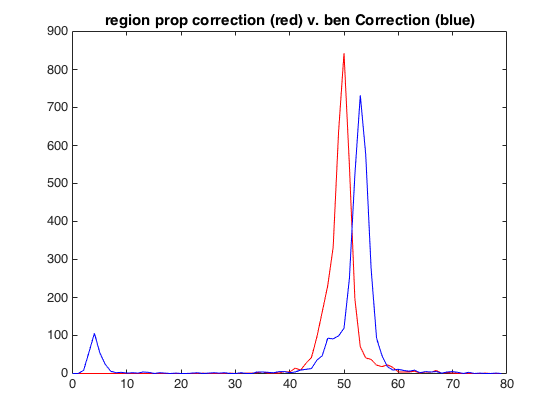

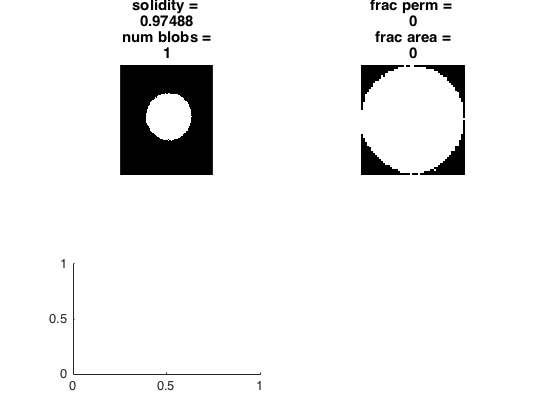

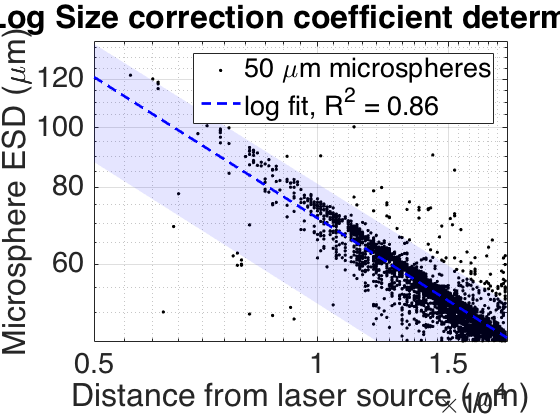

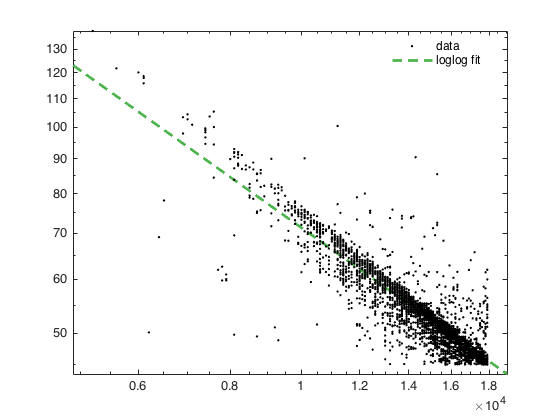

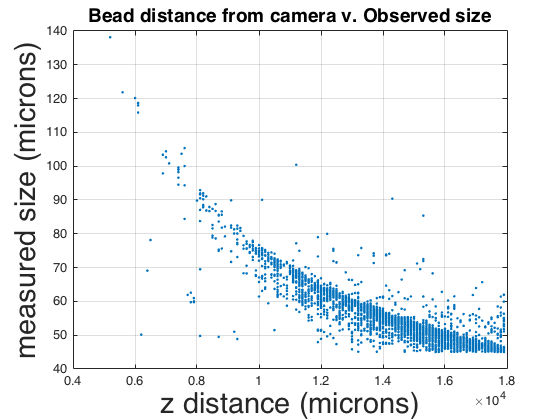

In [7]:
% a few test lines
% use this script to do the beads correction -- may 2, 2018

% load 

% for the graphical bead viewer, run ths program from the NAS/msi

clear 
close all
clc

load testingBeads_426_combineAll

qq=1:5;

newOriginalImage=vertcat(dihm(qq).originalImageDIHM);
newFinalImage=vertcat(dihm(qq).finalImageDIHM);
newESD = vertcat(dihm(qq).esdDIHM);
% junkk = vertcat(dihm(qq).junk_flag);
solidss = vertcat(dihm(qq).solidityDIHM);
blobs = vertcat(dihm(qq).numberBlobsDIHM);
fracPerim = vertcat(dihm(qq).fractionEdgePerimRoiDIHM);
fracArea = vertcat(dihm(qq).fractionEdgePerimRoiTotalAreaLargestDIHM);
peaksTot = horzcat(dihm(qq).peaks_tot);
peaksTot = peaksTot';
benImage = vertcat(dihm(qq).roiFID);
benESD = vertcat(dihm(qq).w_ESD);

regionESD = vertcat(dihm(qq).esdDIHM);
x = vertcat(dihm(qq).w_X);
y = vertcat(dihm(qq).w_Y);
z = vertcat(dihm(qq).w_Z);

benESD = benESD ./ (1+0.000021.*z);

%% find junk
% 1 - max distance
    junk_z = z>=18000;

% 2 -remove radial outliers based on the empircally determined radius
%     radius_actual = sqrt(x.^2+y.^2); % find the radius for each point
%     radius_theoretical = dihm_radial_outliers(1)*z - dihm_radial_outliers(2); % formula for geometric radius
%     junk_radial = radius_actual>= radius_theoretical;
    junk_radial = zeros(length(x),1);

% 3 - remove junk using peaks
    junk_peaks = peaksTot>6; % junk_flag = junk_z + junk_radial; 
%     junk_peaks = zeros(length(x),1);

% 4 - remove junk using size - eventually replace this with a small stuff approximation?
    junk_size = regionESD < 45;
%     junk_size = benESD < 43;

% 5 - Solidity threshold
    junk_solidity = solidss < 0.8;
    
% 6 - Total number of blobs threshold
    junk_numberMultiblob = blobs > 5;

% 7 - Fraction of perimeter occupied by roi has to be less than: 0.15
    junk_fractionPerim = fracPerim > 0.15;

% 8 - Fraction of final roi area on edge has to be less than: 0.08
    junk_fractionPerimTotalArea = fracArea > 0.08;

% 9 - add them up
    junkk = junk_z + junk_radial + junk_peaks + junk_size + junk_solidity + junk_numberMultiblob + junk_fractionPerim + junk_fractionPerimTotalArea;


%% remove junk
newESD(junkk>0)=[];
newFinalImage(junkk>0)=[];
newOriginalImage(junkk>0)=[];
solidss(junkk>0)=[];
blobs(junkk>0)=[];
fracPerim(junkk>0)=[];
fracArea(junkk>0)=[];
peaksTot(junkk>0)=[];
benImage(junkk>0)=[];
benESD(junkk>0)=[];
regionESD(junkk>0)=[];
z(junkk>0)=[];

%% new correction
figure(3332)
[sloper, interceptr, MSEr, R2, S, ~, linePlot, h] = logfit(z,regionESD,'loglog');

yApprox = (10^interceptr)*z.^(sloper);

figure(3232)
plot(z,regionESD,'.')
xlabel('z distance (microns)','FontSize',22)
ylabel('measured size (microns)','FontSize',22)
title('Bead distance from camera v. Observed size','FontSize',14)
grid on

figure(232)
plot(z,yApprox,'.')
yApproxFactor = (10^interceptr)*z.^(sloper) ./ 50;
finalCorrectedRPesd = regionESD ./ yApproxFactor;

% code to be used for new size correction: 
[sloper, interceptr, MSEr, R2, S, ~, linePlot, h] = logfit(z,regionESD,'loglog');
% interceptr = 4.9053;
% sloper = -0.763035;
yApproxFactor = (10^interceptr)*z.^(sloper) ./ 50;
finalCorrectedRPesd = regionESD ./ yApproxFactor;
% yApprox = (10^intercept)*x.^(slope);


% PAPER code to be used for new size correction: 
% [sloperP, interceptrP, ~, ~, ~, ~, ~, ~] = logfit(z.*.001, regionESD.*.001,'loglog');
% % interceptr = -.3838;
% % sloper = -0.763035;
% yApproxFactorP = (10^interceptrP)*(z.* .001).^(sloperP) ./ (50 *.001);
% finalCorrectedRPesdP = (regionESD .*.001)  ./ yApproxFactorP;
% % yApprox = (10^intercept)*x.^(slope);



interceptrHigh = interceptr .* (1 + MSEr ./ 50);
interceptrLow = interceptr .* (1 - MSEr ./ 50);

xAx = [5000 18000];
yApproxFactorHigh = (10^interceptrHigh)*xAx.^(sloper) ./ 50;
yApproxFactorLow = (10^interceptrLow)*xAx.^(sloper) ./ 50;


% interceptr = 4.9053;
% sloper = -0.763035;
paperCorrectFraction = mean([regionESD ./50 ])

%% format a new figure
figure(1111)
compareBead = loglog(z,regionESD,'k.','MarkerSize',10);
hold on
grid on
compareBeadFit = plot(linePlot.XData,linePlot.YData, 'b--','LineWidth',2);

% compareBeadFitHigh = loglog(xAx, yApproxFactorHigh, 'r--');
% compareBeadFitHigh = loglog(xAx, yApproxFactorLow, 'r--');

% compareBeadFitHigh = loglog(xAx, yApproxFactorHigh, 'r--');
% compareBeadFitHigh = loglog(xAx, [137 52], 'r--');

xlim([5000 18000])
ylim([45 138])

    l = legend([compareBead,compareBeadFit],{'50 \mum microspheres','log fit, R^2 = 0.86'});
    l.FontSize=20;
    title({'LogLog Size correction coefficient determination'},'FontSize',28)
    xlabel('Distance from laser source (\mum)','FontSize',22)
    ylabel('Microsphere ESD (\mum)','FontSize',22)
%     set(gca,'XTick',[10  25 50 100 200])
    set(gca,'FontSize',22)
%     grid on
%     set(gca,'XTickLabelMode','manual')
%     set(gca,'XTickLabel',[5000 12000 18000])
    
%     confidence = -1.*(sloper + (2 .* MSEr));  
    
    % fc patch ci
%     beadPatchX = [linePlot.XData, fliplr(linePlot.XData)];
%     beadPatchY = [confidence.*linePlot.YData,  fliplr((1./confidence) .* linePlot.YData)];

%     beadPatchX = [linePlot.XData(1), linePlot.XData(end), linePlot.XData(end), linePlot.XData(1)];
%     beadPatchY = [confidence + linePlot.YData(1),  confidence + linePlot.YData(end),linePlot.YData(end) - confidence, linePlot.YData(1) - confidence ];
    beadPatch = patch([5000 18000 18000 5000],[137 52 33 88],'b','FaceAlpha',0.1, 'LineStyle','none');


%% compare the corrections
bins = 0:1:80;
hisRP = histcounts(finalCorrectedRPesd,bins);
hisBen = histcounts(benESD,bins);

figure(3332)
plot(bins(1:end-1),hisRP,'r')
hold on
plot(bins(1:end-1),hisBen,'b')
title('region prop correction (red) v. ben Correction (blue)')

%% plot and sort
for i = 1:length(newESD)
        figure(1)
        subplot(221)
        imshow(newOriginalImage{i})
        title( {'solidity = ', num2str( solidss(i) ), ' num blobs = ', num2str( blobs(i) )  } )
%         title( {'solidity = ', num2str( solidss(i) ), ' num blobs = ', num2str( blobs(i) ), ' num peaks = ', num2str( peaksTot(i) )   } )
        subplot(222)
%         try
        imshow(newFinalImage{i})
        title({'frac perm = ', num2str( fracPerim(i)  ),' frac area = ', num2str(   fracArea(i)  )}  )
        
        subplot(223)
        imshow(char(benImage(i)))
        title({'ben esd = ', num2str( benESD(i)  ),' rp esd = ', num2str(   finalCorrectedRPesd(i)  ), 'z = ', num2str(z(i))  }  )
%         catch
%         end
        pause
        
        % insert event listeners here for sorting, organizing
        
end

paperCorrectFraction = mean([regionESD ./50 ])


> In legend>set_children_and_strings (line 629)
  In legend>make_legend (line 321)
  In legend (line 247)
  In gizmoParticleSizes_fixYaxis_stacker_log (line 25)
> In legend>set_children_and_strings (line 629)
  In legend>make_legend (line 321)
  In legend (line 247)
  In gizmoParticleSizes_fixYaxis_stacker_average_log (line 43)
> In xlabel (line 39)
  In gizmoParticleSizes_fixYaxis_stacker_average_log_comb_stdl (line 44)
> In logfit (line 340)
> In logfit (line 340)
> In logfit (line 340)

paperNiskinMax =

  105.6453



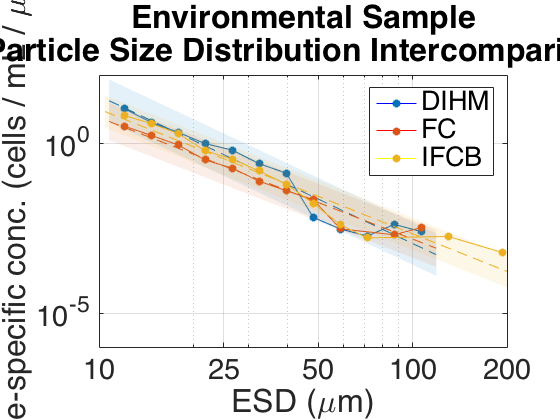

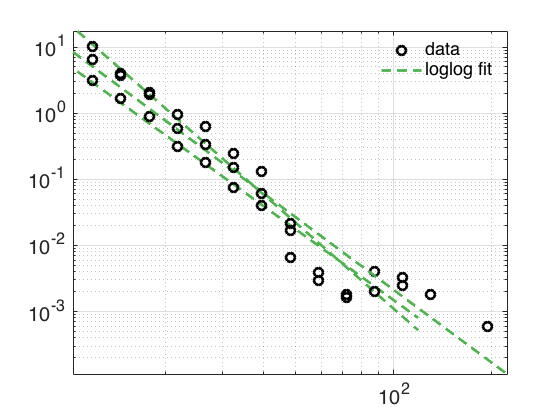

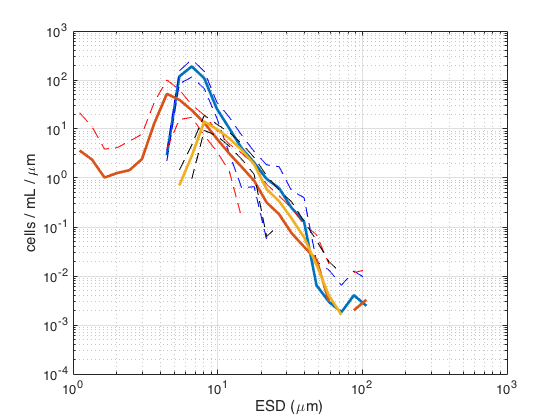

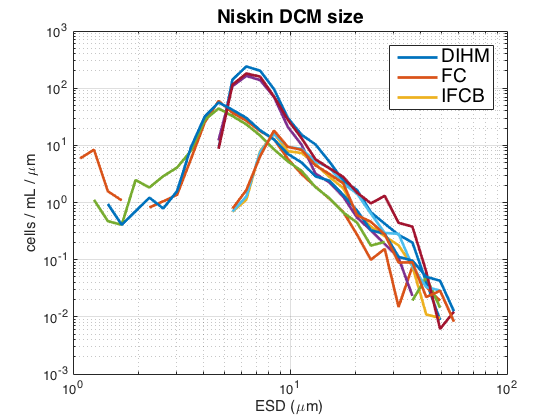

In [8]:
clear all
close all
clc

load /Users/noahwalcutt/Documents/MatLab/gizmoPaper/dihmAnalysisMay23/organismDIHM_NiskinNoFilter
load organismIFCB
load organismFC

dihm=finalDIHM;

% global find and replace for repeated_sf_plane replace with
% esdDIHMrpCorrected -- May 29

%% filter funk
    % regionprop variables - used for junk ID
%         minPixel = 20; % used for regionprop clean up 4/20/18
        minSolidity = 0.1;% 0.8;
        maxNumBlob = 100;%4;
        maxfractionPerim = 0.001;% 0.15;
        maxfractionPerimTotalArea = 0.0100;% 0.08; 0.01 is good
%         peaks_filter_number = 2;% 5; % number over which objects are considered junk
        dihm_radial_outliers = [0.08;100]; % [m;b] ie. slope and intercept, approximate
        conc_min_size = [repmat(0,1,5),repmat(0,1,3),repmat(0,1,5),repmat(0,1,3),repmat(0,1,5)]; % microns ESD, bdhnp


        for qq = 1:length(dihm)
        [dihm(qq).junk_flag(:), dihm(qq).junk_z, dihm(qq).junk_radial, dihm(qq).junk_size, dihm(qq).junk_solidity, dihm(qq).junk_numberMultiblob, dihm(qq).junk_fractionPerim, dihm(qq).junk_fractionPerimTotalArea ] =...
        dihm_analysis_find_junk(  dihm(qq).w_X(:),  dihm(qq).w_Y(:),  dihm(qq).w_Z(:),  dihm(qq).esdDIHMrpCorrected(:),        dihm(qq).solidityDIHM, dihm(qq).numberBlobsDIHM, dihm(qq).fractionEdgePerimRoiDIHM, dihm(qq).fractionEdgePerimRoiTotalAreaLargestDIHM,...
        dihm_radial_outliers,  conc_min_size(qq), minSolidity, maxNumBlob, maxfractionPerim, maxfractionPerimTotalArea); % env2 and env3 dihm_analysis_find_junk_no_peaks()

%      [dihm(qq).junk_flag(:), dihm(qq).junk_z, dihm(qq).junk_radial, dihm(qq).junk_peaks, dihm(qq).junk_size, dihm(qq).junk_solidity, dihm(qq).junk_numberMultiblob, dihm(qq).junk_fractionPerim, dihm(qq).junk_fractionPerimTotalArea ] =...
%         dihm_analysis_find_junk(  dihm(qq).w_X(:),  dihm(qq).w_Y(:),  dihm(qq).w_Z(:),  dihm(qq).esdDIHMrpCorrected(:),        dihm(qq).solidityDIHM, dihm(qq).numberBlobsDIHM, dihm(qq).fractionEdgePerimRoiDIHM, dihm(qq).fractionEdgePerimRoiTotalAreaLargestDIHM,...
%         dihm_radial_outliers,  dihm(qq).peaks_tot(:), peaks_filter_number, conc_min_size(qq), minSolidity, maxNumBlob, maxfractionPerim, maxfractionPerimTotalArea); % env2 and env3 dihm_analysis_find_junk_no_peaks()

    
%     [dihm(qq).junk_flag(:)] = dihm_analysis_find_junk_no_peaks(dihm(qq).w_X(:),  dihm(qq).w_Y(:),  dihm(qq).w_Z(:),  dihm(qq).w_ESD(:),...
%         dihm_radial_outliers,  conc_min_size(qq)); % env2 and env3 dihm_analysis_find_junk_no_peaks()
    
%     dihm(qq).ans_total_holograms(:) = length(unique(dihm(qq).w_filename(:)));
    
    % remove junk from abundance and size corrections
%         junk_unfiltered = length(dihm(qq).w_X);
%         dihm(qq).w_Xcorrected(dihm(qq).junk_flag(:)>0) = [];
%         dihm(qq).w_Ycorrected(dihm(qq).junk_flag(:)>0) = [];
%         dihm(qq).w_Zcorrected(dihm(qq).junk_flag(:)>0) = [];
%         dihm(qq).w_ESDcorrected(dihm(qq).junk_flag(:)>0) = [];
%         dihm(qq).w_ESVcorrected(dihm(qq).junk_flag(:)>0) = [];
%         dihm(qq).w_filenamecorrected(dihm(qq).junk_flag(:)>0) = [];
%         dihm(qq).w_Holofilecorrected(dihm(qq).junk_flag(:)>0) = [];    
%         dihm(qq).w_timecorrected(dihm(qq).junk_flag(:)>0) = [];    
        
        % new Region Prop ID'd junk
%             dihm(qq).w_X(dihm(qq).junk_flag(:)>0) = [];
%             dihm(qq).w_Y(dihm(qq).junk_flag(:)>0) = [];
%             dihm(qq).w_Z(dihm(qq).junk_flag(:)>0) = [];
%             dihm(qq).w_ESD(dihm(qq).junk_flag(:)>0) = [];
%             dihm(qq).w_ESV(dihm(qq).junk_flag(:)>0) = [];
%             dihm(qq).w_filename(dihm(qq).junk_flag(:)>0) = [];
%             dihm(qq).w_Holofile(dihm(qq).junk_flag(:)>0) = [];    
%             dihm(qq).w_time(dihm(qq).junk_flag(:)>0) = [];
%             dihm(qq).solidityDIHM(dihm(qq).junk_flag(:)>0) = [];
%             dihm(qq).majDIHM(dihm(qq).junk_flag(:)>0) = [];
%             dihm(qq).minDIHM(dihm(qq).junk_flag(:)>0) = [];
            dihm(qq).esdDIHMrp(dihm(qq).junk_flag(:)>0) = [];
%             dihm(qq).areaDIHM(dihm(qq).junk_flag(:)>0) = [];
%             dihm(qq).numberBlobsDIHM(dihm(qq).junk_flag(:)>0) = [];
%             dihm(qq).fractionEdgePerimRoiDIHM(dihm(qq).junk_flag(:)>0) = [];
%             dihm(qq).fractionEdgePerimRoiTotalAreaLargestDIHM(dihm(qq).junk_flag(:)>0) = [];
% %             dihm(qq).originalImageDIHM(dihm(qq).junk_flag(:)>0) = [];
% %             dihm(qq).finalImageDIHM(dihm(qq).junk_flag(:)>0) = [];
%             dihm(qq).roiFID(dihm(qq).junk_flag(:)>0) = [];
            dihm(qq).esdDIHMrpCorrected(dihm(qq).junk_flag(:)>0) = [];

%       remove filter for objects past 15000
    
%         dihm(qq).ans_junk_removed_percent = 1 - (length(dihm(qq).w_X)/junk_unfiltered);
    

        end
        
        finalDIHM = dihm;
%% scale the abundance of the filtered funk
        
%% Niskin plots 1 - surface
 tag = {'Niskin Surface','Niskin MLD','Niskin DCM','Pro','Pro'};

 for i = 40:48;
    % remove black dot on IFCB between 7.8 and 8.1
    deleteIFCB = find([ifcb(i).esd] >=9.6 & [ifcb(i).esd] <= 10.2);
    ifcb(i).esd(deleteIFCB) = [];
 end


bins = {logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30)};


 figure(466)
%     subplot(1,5,4)

    [stacked_plots(4)] = gizmoParticleSizes_fixYaxis_stacker_log(finalDIHM(1).esdDIHMrpCorrected,bins{4},tag{1},finalDIHM(1).ans_total_volume_sampled);
    hold on
    
%     subplot(1,5,4)
    [stacked_plots(9)] = gizmoParticleSizes_fixYaxis_stacker_average_log({fc(41:43).esd},bins{4},tag{1},{fc(41:43).volPro});

%     subplot(1,5,4)
    [stacked_plots(14)] = gizmoParticleSizes_fixYaxis_stacker_average_log({ifcb(40:42).esd},bins{4},tag{1},{ifcb(40:42).ml_analyzed});
%     hold off

    
     %% Niskin plots 2 - mld


bins = {logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30)};
%  figure(5)
%     subplot(1,5,4)
    [stacked_plots(4)] = gizmoParticleSizes_fixYaxis_stacker_log(finalDIHM(2).esdDIHMrpCorrected,bins{4},tag{2},finalDIHM(2).ans_total_volume_sampled);
    hold on
    
%     subplot(1,5,4)
    [stacked_plots(9)] = gizmoParticleSizes_fixYaxis_stacker_average_log({fc(43:44).esd},bins{4},tag{2},{fc(43:44).volPro});

%     subplot(1,5,4)
    [stacked_plots(14)] = gizmoParticleSizes_fixYaxis_stacker_average_log({ifcb(43:45).esd},bins{4},tag{2},{ifcb(43:45).ml_analyzed});
%     hold off
    
    
     %% Niskin plots 3 - dcm

bins = {logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30)};
%  figure(6)
%     subplot(1,5,4)
    [stacked_plots(4)] = gizmoParticleSizes_fixYaxis_stacker_log(finalDIHM(3).esdDIHMrpCorrected,bins{4},tag{3},finalDIHM(3).ans_total_volume_sampled);
    hold on
    
%     subplot(1,5,4)
    [stacked_plots(9)] = gizmoParticleSizes_fixYaxis_stacker_average_log({fc(45:46).esd},bins{4},tag{3},{fc(45:46).volPro});

%     subplot(1,5,4)
    [stacked_plots(14)] = gizmoParticleSizes_fixYaxis_stacker_average_log({ifcb(46:48).esd},bins{4},tag{3},{ifcb(46:48).ml_analyzed});
    hold off

%% Niskin average all depths and compute standard deviation
color = {'b--';'r--';'k--'};
% bins = {logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30);logspace(0,1.85,30)};
bins = {logspace(0,2.5,30);logspace(0,2.5,30);logspace(0,2.5,30);logspace(0,2.5,30);logspace(0,2.5,30)};

 figure(10)
%     subplot(1,5,4)
%     [stacked_plots(4)] = gizmoParticleSizes_fixYaxis_stacker_log(finalDIHM(16).w_ESD,bins{4},tag{3},finalDIHM(16).ans_total_volume_sampled);
    [stacked_plots(91)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb({finalDIHM(1:3).esdDIHMrpCorrected},bins{4},tag{3},{finalDIHM(1:3).ans_total_volume_sampled});
    hold on
    [stacked_plots(92)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb_stdu({finalDIHM(1:3).esdDIHMrpCorrected},bins{4},tag{3},{finalDIHM(1:3).ans_total_volume_sampled},color{1});
    [stacked_plots(93)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb_stdl({finalDIHM(1:3).esdDIHMrpCorrected},bins{4},tag{3},{finalDIHM(1:3).ans_total_volume_sampled},color{1});

    
%     subplot(1,5,4)
    [stacked_plots(94)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb({fc(41:46).esd},bins{4},tag{3},{fc(41:46).volPro});
    [stacked_plots(95)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb_stdu({fc(41:46).esd},bins{4},tag{3},{fc(41:46).volPro},color{2});
    [stacked_plots(96)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb_stdl({fc(41:46).esd},bins{4},tag{3},{fc(41:46).volPro},color{2});

    
%     subplot(1,5,4)
    [stacked_plots(97)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb({ifcb(40:48).esd},bins{4},tag{3},{ifcb(40:48).ml_analyzed});
    [stacked_plots(98)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb_stdu({ifcb(40:48).esd},bins{4},tag{3},{ifcb(40:48).ml_analyzed},color{3});
    [stacked_plots(99)] = gizmoParticleSizes_fixYaxis_stacker_average_log_comb_stdl({ifcb(40:48).esd},bins{4},tag{3},{ifcb(40:48).ml_analyzed},color{3});

    hold off
    
    
    %% fit a linear trend lin in loglog space - testing
    % eliminate x/y values greater than 5
%     clf
    figure(11)
    xdata = stacked_plots(91).XData;
    ydata = stacked_plots(91).YData;
    n=10;
    filter = find(xdata<n); % filter out particles less than 5
    xdata(filter)=[];
    ydata(filter)=[];
    savePSD(1,:)=[ydata];
    
    % DIHM, FC, IFCB = slope order
    [slope(1), intercept(1),MSE(1), R2(1), S(1), ~, linePlot{1}, h{1}] = logfit(xdata,ydata,'loglog');
    grid on
    hold on
    
    xdata = stacked_plots(94).XData;
    ydata = stacked_plots(94).YData;
    filter = find(xdata<n); % filter out particles less than 5
    xdata(filter)=[];
    ydata(filter)=[];
    [slope(2), intercept(2),MSE(2), R2(2), S(2), ~, linePlot{2}, h{2}] = logfit(xdata,ydata,'loglog');
     savePSD(3,:)=[ydata];
    
    xdata = stacked_plots(97).XData;
    ydata = stacked_plots(97).YData;
    filter = find(xdata<n); % filter out particles less than 5
    xdata(filter)=[];
    ydata(filter)=[];
    [slope(3), intercept(3),MSE(3), R2(3), S(3), ~, linePlot{3}, h{3}] = logfit(xdata,ydata,'loglog');
    savePSD(2,:)=[ydata];
    
 %% fit a linear trend to the Niskin Bottles
 colorL = {'b--';'r--';'y--'};
 colorP = {'bo';'ro';'yo'};
%  color = {'b','r','y'};
color = {[0 0.447 0.741],[.85 .325 .098],[.929 .694 .125]};


 q= 5;
    figure(21)
    % dihm
    dihmFit = loglog(linePlot{1}.XData,  linePlot{1}.YData, 'Color', color{1},'LineStyle','--');
    
    hold on
    grid on
    dihmPoint = loglog(h{1}.XData,h{1}.YData, colorP{1}, 'MarkerSize',q,'MarkerFaceColor',color{1},'MarkerEdgeColor',color{1},'LineStyle','-');
    dihmPoint2 = loglog(h{1}.XData,h{1}.YData,'Color',color{1});    
    
    % compute confidence intervals
      % CI = slope +- [t* x SE ] (t=2 degrees, 95% CI)
%     confidence(1) = slope(1) + (2 .* MSE(1));
    confidence = -1.*(slope + (2 .* MSE));  

    dihmPatchX = [linePlot{1}.XData, fliplr(linePlot{1}.XData)];
    dihmPatchY = [confidence(1).*linePlot{1}.YData,  fliplr((1./confidence(1)) .* linePlot{1}.YData)];
    dihmPatch = patch(dihmPatchX,dihmPatchY,color{1},'FaceAlpha',0.1, 'LineStyle','none');
    
    % fc
    fcFit = loglog(linePlot{2}.XData,  linePlot{2}.YData,'Color', color{2},'LineStyle','--');
    fcPoint = loglog(h{2}.XData,h{2}.YData, colorP{2}, 'MarkerSize',q,'MarkerFaceColor',color{2},'MarkerEdgeColor',color{2},'LineStyle','-');
    fcPoint2 = loglog(h{2}.XData,h{2}.YData,'Color',color{2}); 
    
    % fc patch ci
    fcPatchX = [linePlot{2}.XData, fliplr(linePlot{2}.XData)];
    fcPatchY = [confidence(2).*linePlot{2}.YData,  fliplr((1./confidence(2)) .* linePlot{2}.YData)];
    fcPatch = patch(fcPatchX,fcPatchY,color{2},'FaceAlpha',0.1, 'LineStyle','none');
    
    % ifcb
    ifcbFit = loglog(linePlot{3}.XData,  linePlot{3}.YData, 'Color',color{3},'LineStyle','--');
    ifcbPoint = loglog(h{3}.XData,h{3}.YData, colorP{3}, 'MarkerSize',q,'MarkerFaceColor',color{3},'MarkerEdgeColor',color{3},'LineStyle','-');
    ifcbPoint2 = loglog(h{3}.XData,h{3}.YData,'Color',color{3}); 
    
    % ifcb patch ci
    ifcbPatchX = [linePlot{3}.XData, fliplr(linePlot{3}.XData)];
    ifcbPatchY = [confidence(3).*linePlot{3}.YData,  fliplr((1./confidence(3)) .* linePlot{3}.YData)];
    ifcbPatch = patch(ifcbPatchX,ifcbPatchY,color{3},'FaceAlpha',0.1, 'LineStyle','none');
    
    l = legend([dihmPoint,fcPoint,ifcbPoint],{'DIHM','FC','IFCB'});
    l.FontSize=20;
    title({'Environmental Sample','Particle Size Distribution Intercomparison'},'FontSize',28)
    xlabel('ESD (\mum)','FontSize',22)
    ylabel('Size-specific conc. (cells / mL / \mum)','FontSize',22)
    set(gca,'XTick',[10  25 50 100 200])
    set(gca,'FontSize',22)
    xlim([10 200])
    
    
 %% compute the new niskin concentrations
    dihm_volume = ((pi * 1.0639e+03.^2 * 18000) - (pi * 272.^2 * 5000))/1e+15*1000;
    dihm(qq).ans_total_volume_sampled = dihm(qq).ans_total_holograms(:)*dihm_volume; % mL % converted to mL 1/9/2018
    dihm(qq).ans_conc = dihm(qq).ans_abundance/dihm(qq).ans_total_volume_sampled; 
    
    
%% paper stats
paperNiskinMax = max(vertcat([dihm(3).repeated_sf_plane]))
paperNiskinCC = corrcoef( [[h{2}.YData] + [h{3}.YData(1:end-1)] ./ 2], h{1}.YData(1:end-1));

cv = std(  [-4.3, -3.57,-3.67]./ mean([-4.3, -3.57,-3.67]));



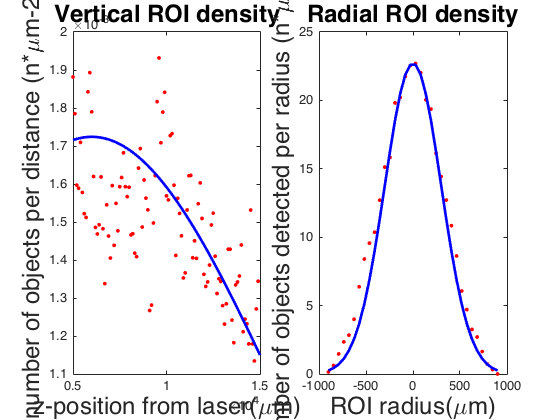

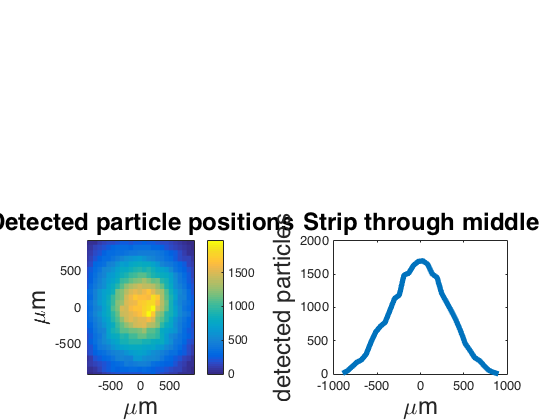

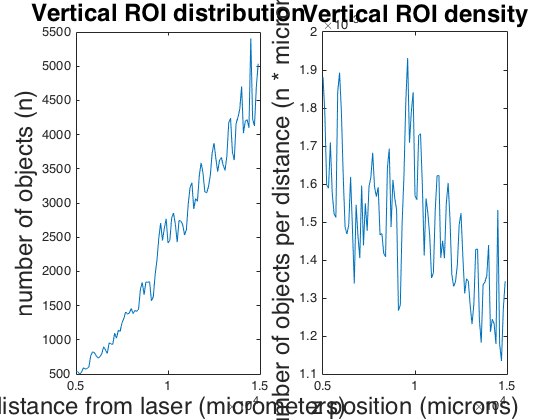

In [9]:
clear all
close all
clc

% updated may 25, 2018

% cd /Users/noahwalcutt/Documents/MatLab/FLK/

% compute r(z)
% load FLK_data_exp1_all

load organismDIHM

X = cat(1,finalDIHM.w_X);
Y = cat(1,finalDIHM.w_Y);
Z = cat(1,finalDIHM.w_Z);

% locate r max in slice 1

xbin = [-1250:75:1250];
xbin2 = xbin(1:end-1)+75/2;

ybin = [-1250:75:1250];
ybin2 = ybin(1:end-1)+75/2;

zslice = min(Z):100:14900;
[Xbin,Ybin] = meshgrid(xbin2,ybin2);

radius_empirical = sqrt(X.^2+Y.^2); % find the radius for each point

for hi = 1:length(zslice)
    
s1 = find(Z == zslice(hi));
radius_geometric_max = 0.08*zslice(hi) - 100; % formula for radius as a function of 
area_per_slice(hi,1) = pi*radius_geometric_max.^2;
radius_inliers = find(radius_empirical(s1) <= radius_geometric_max);  


h = histcounts2(X(radius_inliers),Y(radius_inliers),xbin,ybin);
% figure(1)
% colormap(jet)
% 
% pcolor(Xbin,Ybin,log10(h/max(h(:))));
% title([num2str(zslice(hi)), ' inliers = ' , num2str(length(radius_inliers)), ' total = ', num2str(length(s1))])
% shading flat
% colorbar
% 
% 
% 
% % area(hi,1)=pi*
zsum(hi,1) = sum(h(:));
% 
% pause
end
% z1 5000, r1 = 300, z2 = 15000, r2 = 1100 -- solve for m and b -- m = .08
% b = -100

figure(2)
subplot(121)
plot(zslice,zsum)
title('Vertical ROI distribution','fontsize',18)
xlabel('distance from laser (micrometers)','fontsize',18)
ylabel('number of objects (n)','fontsize',18)

subplot(122)
plot(zslice,zsum./area_per_slice)
title('Vertical ROI density','fontsize',18)
xlabel('z position (microns)','fontsize',18)
ylabel('number of objects per distance (n * micron-2)','fontsize',18)




% collapse all the particle X Y positions into one hologram
raw_collapsed_xy = hist2(X,Y,xbin,ybin);
figure(3)
subplot(223)
pcolor(xbin,ybin,raw_collapsed_xy)
axis([-900 900 -900 900])
title('Detected particle positions','fontsize',18)
xlabel('\mum','fontsize',18)
ylabel('\mum','fontsize',18)
shading flat
colorbar

subplot(224)
mm = max(raw_collapsed_xy(:,17)+raw_collapsed_xy(:,18));
plot(linspace(-900,900,34),raw_collapsed_xy(:,17)+raw_collapsed_xy(:,18)./mm,'LineWidth',4)
title('Strip through middle','fontsize',18)
xlabel('\mum','fontsize',18)
ylabel('detected particles','fontsize',18)



figure(33)
subplot(121)
plot(zslice,zsum./area_per_slice,'r.','MarkerSize',12)
title('Vertical ROI density','fontsize',18)
xlabel('z-position from laser(\mum)','fontsize',18)
ylabel('number of objects per distance (n*\mum-2)','fontsize',18)

hold on

Ro = 6000;
% Ro = 8000;
% gamma2 = (Rmax-Ro)./sqrt(-2*log(0.55));
gamma2 = 10000;
% C4 = exp(-0.5*((z-Ro)./gamma2).^2);
C5 = exp(-0.5*(([5000:15000]-Ro)./gamma2).^2);
plot([5000:15000],C5./580,'b','LineWidth',2)
% plot([5000:15000],C5./300)




% figure(34)
subplot(122)
bw=75;
plot(linspace(-900,900,34),(raw_collapsed_xy(:,17)+raw_collapsed_xy(:,18)./mm) ./ bw,'r.','MarkerSize',12)

% plot(zslice,zsum./area_per_slice,'r','LineWidth',2)
title('Radial ROI density','fontsize',18)
xlabel('ROI radius(\mum)','fontsize',18)
ylabel('Number of objects detected per radius (n*\mum-2)','fontsize',18)

hold on
    gamma = 300;%466;
    radius_plane = sqrt(X.^2 + Y.^2);
    coefficientAxial = exp(-0.5*(radius_plane/gamma).^2);
    plot(linspace(-900,900,34),1703.*exp(-0.5*(linspace(-900,900,34)/gamma).^2) ./ bw,'b','LineWidth',2);
    

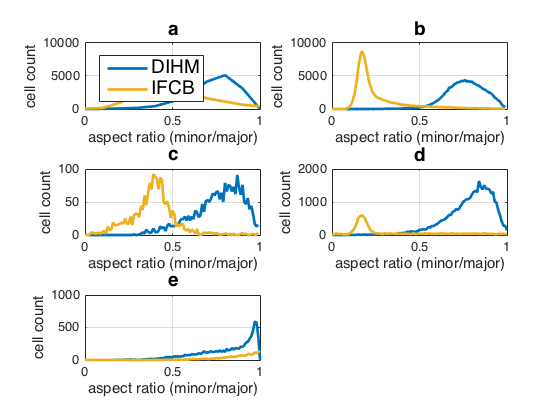

In [10]:
clear all
close all


% compare aspect ratio of dihm v. ifcb

% load /Users/noahwalcutt/Documents/MatLab/gizmoPaper/gizmoAnalysis/concolidate_output/dihmFinal.mat
load /Users/noahwalcutt/Documents/MatLab/gizmoPaper/dihmAnalysisMay23/organismDIHM
load organismIFCB

% finalDIHM = finalStats;

clear ifcbHetaspH ifcbHet5
bins = 0:.1:2;
dihmHetasp = vertcat(finalDIHM(9:12).minDIHM) ./ vertcat(finalDIHM(9:12).majDIHM);
dihmHetaspH = histcounts(dihmHetasp,bins);

ifcbHet5 = vertcat(ifcb(26:39).maj) ./ vertcat(ifcb(26:39).min);
ifcbHetaspH = histcounts(ifcbHet5,bins);

blue = [0 0.447 0.741];
yellow = [.929 .694 .125 ];

figure(109)
subplot(321)
dihmP = plot(bins(1:end-1),dihmHetaspH,'Color', blue,'LineWidth',2);
hold on
ifcbP = plot(bins(1:end-1),ifcbHetaspH,'Color', yellow,'LineWidth',2);
% title('Akashiwo sanguinea aspect ratios','FontSize',14)
title('a','FontSize',14)
lll = legend([dihmP,ifcbP],{'DIHM','IFCB'});
lll.FontSize = 14;
lll.Location = 'Northwest';
xlim([0 1])
xlabel('aspect ratio (minor/major)')
ylabel('cell count')
grid on


% dun

clear ifcbHetaspH ifcbHet5
bins = 0:.01:1;
dihmHetasp = finalDIHM(8).minDIHM ./ finalDIHM(8).majDIHM;
dihmHetaspH = histcounts(dihmHetasp,bins);

ifcbHet5 = vertcat(ifcb(16:24).maj) ./ vertcat(ifcb(16:24).min);
ifcbHetaspH = histcounts(ifcbHet5,bins);

% figure(13309)
subplot(322)
plot(bins(1:end-1),dihmHetaspH,'Color', blue,'LineWidth',2)
hold on
plot(bins(1:end-1),ifcbHetaspH,'Color', yellow,'LineWidth',2)
% title('Dunaliella tertiolecta aspect ratios','FontSize',14)
title('b','FontSize',14)
xlim([0 1])
xlabel('aspect ratio (minor/major)')
ylabel('cell count')
grid on

clear ifcbHetaspH ifcbHet5
bins = 0:.01:1;
dihmHetasp = finalDIHM(21).minDIHM ./ finalDIHM(21).majDIHM;
dihmHetaspH = histcounts(dihmHetasp,bins);

ifcbHet5 = vertcat(ifcb(49:63).maj) ./ vertcat(ifcb(49:63).min);
ifcbHetaspH = histcounts(ifcbHet5,bins);

% figure(13309)
subplot(323)
plot(bins(1:end-1),dihmHetaspH,'Color', blue,'LineWidth',2)
hold on
plot(bins(1:end-1),ifcbHetaspH,'Color', yellow,'LineWidth',2)
% title('Prorocentrum micans aspect ratios','FontSize',14)
title('c','FontSize',14)
xlim([0 1])
xlabel('aspect ratio (minor/major)')
ylabel('cell count')
grid on


clear ifcbHetaspH ifcbHet5
bins = 0:.01:2;
dihmHetasp = vertcat(finalDIHM(16).minDIHM) ./ vertcat(finalDIHM(16).majDIHM);
dihmHetaspH = histcounts(dihmHetasp,bins);

ifcbHet5 = vertcat(ifcb(40:48).maj) ./ vertcat(ifcb(40:48).min);
ifcbHetaspH = histcounts(ifcbHet5,bins);

% figure(10559)
subplot(324)
plot(bins(1:end-1),dihmHetaspH,'Color', blue,'LineWidth',2)
hold on
plot(bins(1:end-1),ifcbHetaspH,'Color', yellow,'LineWidth',2)
% title('Environmental Sample aspect ratios','FontSize',14)
title('d','FontSize',14)
xlim([0 1])
xlabel('aspect ratio (minor/major)')
ylabel('cell count')
grid on





% beads

clear ifcbHetaspH ifcbHet5
bins = 0:.01:3;
dihmHetasp = finalDIHM(5).minDIHM ./ finalDIHM(5).majDIHM;
dihmHetaspH = histcounts(dihmHetasp,bins);

ifcbHet5 = vertcat(ifcb(1:15).min) ./ vertcat(ifcb(1:15).maj);
ifcbHetaspH = histcounts(ifcbHet5,bins);

% figure(1309)
subplot(325)
plot(bins(1:end-1),dihmHetaspH,'Color', blue,'LineWidth',2)
hold on
plot(bins(1:end-1),ifcbHetaspH,'Color', yellow,'LineWidth',2)
% title('Microsphere aspect ratios','FontSize',14)
title('e','FontSize',14)
xlim([0 1])
xlabel('aspect ratio (minor/major)')
ylabel('cell count')
grid on